In [1]:
import pandas as pd
import numpy as np
import pyarrow
from scipy.stats import mode

In [2]:
path_to_data_folder = r"C:\Users\ssriram1\Inside MD Anderson\Siewerdsen,Jeffrey Harold - data"
data = pd.read_parquet(rf"{path_to_data_folder}\procedure_data.parquet.gzip", engine='pyarrow')

In [3]:
(data['ID'].unique())

array(['d246c3c70e', '8175dda8cb', 'bbb3e72ba7', ..., '9dbec6bf8d',
       'e890474a81', '96aea193b1'], dtype=object)

In [4]:
(data.columns)

Index(['ID', 'Age at Surgery', 'Height (cm)', 'Weight (kg)', 'BMI', 'Sex',
       'Ethnicity', 'Primary Race', 'Surgery Diagnosis Name',
       'Surgery Diagnosis Code', 'Location', 'Primary Service',
       'Primary Service (Rolled Up)', 'Patient Class', 'Anesthesia Type',
       'ASA Status', 'Primary Surgeon ID', 'Primary Procedure Name',
       'Primary Procedure CPT Code', 'Robotic Case?',
       'Estimated Case Duration', 'Scheduled Panel 1 Length',
       'Scheduled Panel 2 Length', 'Scheduled Panel 3 Length',
       'Scheduled Panel 4 Length', 'Scheduled Panel 5 Length',
       'Panel 1 Default Length', 'Panel 2 Default Length',
       'Panel 3 Default Length', 'Panel 4 Default Length',
       'Panel 5 Default Length', 'Procedure CPT Code', 'Procedure Name',
       'Scheduled?', 'Performed?', 'Procedure Panel', 'Panel Service',
       'Panel Service (Rolled Up)', 'Panel Primary Surgeon ID',
       'Scheduled Room Duration', 'Intraop Minutes',
       'In Recovery to Discharge Ti

In [5]:
data.head()

ID  Age at Surgery  Height (cm)  Weight (kg)    BMI     Sex  \
660   d246c3c70e              35    169.99966      160.000  24.29  Female   
665   d246c3c70e              35    169.99966      160.000  24.29  Female   
680   d246c3c70e              35    169.99966      160.000  24.29  Female   
692   d246c3c70e              35    169.99966      160.000  24.29  Female   
1004  8175dda8cb              57    186.99988      227.735  29.54    Male   

                   Ethnicity                      Primary Race  \
660       Hispanic or Latino  American Indian or Alaska Native   
665       Hispanic or Latino  American Indian or Alaska Native   
680       Hispanic or Latino  American Indian or Alaska Native   
692       Hispanic or Latino  American Indian or Alaska Native   
1004  Not Hispanic or Latino                White or Caucasian   

                Surgery Diagnosis Name Surgery Diagnosis Code  ... Performed?  \
660     Lymphedema of right upper limb                  I89.0  ...          Y   
665     Lymphedema of right upper limb                  I89.0  ...          N   
680     Lymphedema of right upper limb                  I89.0  ...          N   
692     Lymphedema of right upper limb                  I89.0  ...          Y   
1004  Other acquired deformity of head                  M95.2  ...          Y   

     Procedure Panel          Panel Service Panel Service (Rolled Up)  \
660                1  PLS - PLASTIC SURGERY           Plastic Surgery   
665                1  PLS - PLASTIC SURGERY           Plastic Surgery   
680                1  PLS - PLASTIC SURGERY           Plastic Surgery   
692                1  PLS - PLASTIC SURGERY           Plastic Surgery   
1004               1  PLS - PLASTIC SURGERY           Plastic Surgery   

     Panel Primary Surgeon ID Scheduled Room Duration  Intraop Minutes  \
660                    110700                   660.0            637.0   
665                    110700                   660.0            637.0   
680                    110700                   660.0            637.0   
692                    110700                   660.0            637.0   
1004                   102015                   150.0            179.0   

     In Recovery to Discharge Time Minutes Hours in recovery to discharge  \
660                                 6790.0                     113.166667   
665                                 6790.0                     113.166667   
680                                 6790.0                     113.166667   
692                                 6790.0                     113.166667   
1004                                 161.0                       2.683333   

     LOS 4 groups  
660     60+ hours  
665     60+ hours  
680     60+ hours  
692     60+ hours  
1004    <12 hours  

[5 rows x 44 columns]

## Dealing Procedure Panel Numbers

In [6]:
# Check for duplicate Procedure Panel numbers within each ID group
duplicated_procedure_panel = data.duplicated(subset=['ID', 'Procedure Panel'], keep=False)

# Filter data with duplicated Procedure Panel numbers
duplicated_data = data[duplicated_procedure_panel]

# Group by ID and Procedure Panel to check if there are multiple Panel Services with the same Procedure Panel number
grouped = duplicated_data.groupby(['ID', 'Procedure Panel'])['Panel Service'].nunique()

# Filter groups where there are multiple Panel Services with the same Procedure Panel number
multiple_services = grouped[grouped > 1].reset_index()

# Get the count of such IDs and the IDs themselves
ids_with_multiple_services = multiple_services['ID'].unique()
count_ids = len(ids_with_multiple_services)

# Display the results
print(f"Count of IDs with multiple services having the same procedure panel number: {count_ids}")
print(f"IDs with multiple services having the same procedure panel number: {ids_with_multiple_services}")


Count of IDs with multiple services having the same procedure panel number: 265
IDs with multiple services having the same procedure panel number: ['003d695474' '0107c27bd5' '011176fab0' '017985823b' '03a14259a1'
 '03d81a3452' '04e3c9f917' '04f543f4d7' '05af5254e3' '05dba794bb'
 '066bf37e8d' '07bf9e8439' '0ad195804b' '0dc0d4048e' '0e1681e83c'
 '0ea4dcea0d' '0ebdc5ac13' '1381ac5881' '1519f206aa' '15bdda68b5'
 '177303a797' '19a66a8559' '1c93326ca9' '1f74e9cc35' '1f82b5c671'
 '2021348c0a' '216d6b5674' '225dc03582' '2499797a83' '25091d462e'
 '25eeda4b5e' '26e1566cd4' '26ffcd85fb' '27b2827fd6' '2897b4e1c7'
 '2a74ef4712' '2e86f08b55' '30afe2175c' '30eefa2b61' '3239d74f3b'
 '32b42ed5cf' '32ceeb6379' '3338cad468' '3564f90bb6' '359e43a1a3'
 '360ddd1ec7' '3617b83315' '3638566b24' '3796363efb' '37e3806b67'
 '382e351333' '38da4cf1f7' '3ab63e1552' '3b31a6fa94' '3bad61145b'
 '3f128aa853' '3f280bf211' '41ca9401b0' '41dcd001c6' '43791b6319'
 '43d5d689bf' '43f8620a34' '44a71a0224' '46bea3e3da' '483b3b5

In [7]:
def find_inconsistent_ids(data):
    inconsistent_ids = set()
    
    # Case 1: Different `Procedure Panel` numbers for the same `Panel Service`
    for id, group in data.groupby('ID'):
        service_panel_counts = group.groupby('Panel Service')['Procedure Panel'].nunique()
        if (service_panel_counts > 1).any():
            inconsistent_ids.add(id)
    
    # Case 2: Same `Procedure Panel` numbers for different `Panel Service`
    for id, group in data.groupby('ID'):
        panel_service_counts = group.groupby('Procedure Panel')['Panel Service'].nunique()
        if (panel_service_counts > 1).any():
            inconsistent_ids.add(id)
    
    return list(inconsistent_ids)

inconsistent_ids = find_inconsistent_ids(data)

# Function to resolve inconsistencies
def resolve_inconsistencies(data, inconsistent_ids):
    for id in inconsistent_ids:
        id_data = data[data['ID'] == id].copy()  # Include all rows initially
        
        # Step 1: Fix different `Procedure Panel` numbers for the same `Panel Service`
        for panel_service in id_data['Panel Service'].unique():
            panel_numbers = id_data[id_data['Panel Service'] == panel_service]['Procedure Panel']
            if panel_numbers.nunique() > 1:
                print(f"ID: {id}, Panel Service: {panel_service}, Panel Numbers: {panel_numbers.tolist()}")  # Debug info
                try:
                    # Find the most frequent number
                    panel_counts = panel_numbers.value_counts()
                    most_frequent = panel_counts.idxmax()  # Get the most frequent number
                    print(f"Most Frequent Panel Number: {most_frequent}")  # Debug info
                    # Change the number for rows that are not initially numbered as 1
                    data.loc[(data['ID'] == id) & (data['Panel Service'] == panel_service) & (data['Procedure Panel'] != 1), 'Procedure Panel'] = most_frequent
                except Exception as e:
                    print(f"Error resolving panels for ID {id}, Panel Service {panel_service}: {e}, Panel Numbers: {panel_numbers.tolist()}")
        
        # Step 2: Fix same `Procedure Panel` numbers for different `Panel Service`
        id_data = data[data['ID'] == id].copy()  # Include all rows initially
        used_numbers = set(id_data['Procedure Panel'].unique())
        all_possible_numbers = set(range(1, max(6, len(id_data['Panel Service'].unique()) + 1)))
        available_numbers = list(all_possible_numbers - used_numbers)
        
        for panel_number in id_data['Procedure Panel'].unique():
            services_with_same_panel = id_data[id_data['Procedure Panel'] == panel_number]['Panel Service']
            if services_with_same_panel.nunique() > 1:
                for i, service in enumerate(services_with_same_panel.unique()):
                    if i == 0:
                        continue  # Keep the first service with the current panel number
                    if available_numbers:
                        new_number = available_numbers.pop(0)
                    else:
                        remaining_numbers = list(all_possible_numbers - used_numbers)
                        if not remaining_numbers:
                            new_number = max(used_numbers) + 1
                        else:
                            new_number = np.random.choice(remaining_numbers)
                    data.loc[(data['ID'] == id) & (data['Panel Service'] == service) & (data['Procedure Panel'] != 1), 'Procedure Panel'] = new_number
                    used_numbers.add(new_number)
    
    return data

# Resolve inconsistencies
data = resolve_inconsistencies(data, inconsistent_ids)


ID: e0624b08fc, Panel Service: PLS - PLASTIC SURGERY, Panel Numbers: [1, 2, 1, 1, 1, 1, 2, 1, 1]
Most Frequent Panel Number: 1
ID: c7e5103841, Panel Service: SURG ONC - ENDOCRINE, Panel Numbers: [2, 1, 1, 1]
Most Frequent Panel Number: 1
ID: e45068b53f, Panel Service: SURG ONC - LIVER, Panel Numbers: [1, 1, 1, 1, 2, 1]
Most Frequent Panel Number: 1
ID: efdec908c8, Panel Service: PLS - PLASTIC SURGERY, Panel Numbers: [2, 2, 2, 3, 3]
Most Frequent Panel Number: 2
ID: 833a741ef1, Panel Service: HN - HEAD & NECK SURGERY, Panel Numbers: [1, 3, 3, 1, 3]
Most Frequent Panel Number: 3
ID: a475046103, Panel Service: UROLOGY, Panel Numbers: [3, 3, 3, 5]
Most Frequent Panel Number: 3
ID: 600f36c0c5, Panel Service: PLS - PLASTIC SURGERY, Panel Numbers: [3, 2]
Most Frequent Panel Number: 3
ID: 3c64afffbb, Panel Service: UROLOGY, Panel Numbers: [2, 4, 2]
Most Frequent Panel Number: 2
ID: a561a10fdb, Panel Service: PLS - PLASTIC SURGERY, Panel Numbers: [1, 2, 1, 1, 2, 1]
Most Frequent Panel Number: 1

In [8]:
# Function to update procedure panel numbers
def update_procedure_panels(data, id):
    id_data = data[data['ID'] == id]
    
    # Ensure Primary Service matching Panel Service is numbered as 1
    data.loc[(data['ID'] == id) & (data['Primary Service'] == data['Panel Service']), 'Procedure Panel'] = 1
    
    # Get updated data for the ID after numbering Primary Service matches
    id_data = data[data['ID'] == id]
    
    # Ensure all Panel Service entries are consistent with the updated numbering
    panel_mapping = {}
    for index, row in id_data.iterrows():
        panel_service = row['Panel Service']
        procedure_panel = row['Procedure Panel']
        if panel_service in panel_mapping:
            data.loc[(data['ID'] == id) & (data['Panel Service'] == panel_service), 'Procedure Panel'] = panel_mapping[panel_service]
        else:
            panel_mapping[panel_service] = procedure_panel
    
    return data

# Apply the function to all relevant IDs to make '1' consistent first
for id in ids_with_multiple_services:
    data = update_procedure_panels(data, id)


In [9]:
# List of IDs to extract Procedure Panel numbers for
id_list = [
    '017985823b', '1f82b5c671', '2021348c0a', '2e86f08b55', '359e43a1a3',
    '382e351333', '46bea3e3da', '495a0d8f6f', '4bcb78a729', '5044e026d3',
    '5683c32215', '63074c8262', '654cdd90ae', '66684dad65', '6ce0fd4700',
    '7864fb6325', '79afe849f5', '7b745c1d62', '8008c95743', '809d4ba50b',
    '829d0546a2', '88d20443a4', '88f7214c97', '9188434795', '91b6dc4c72',
    '9619a0ecc9', '97484cd4af', '9aa94b5d6d', '9ba11cb5cd', 'a040d3e8d0',
    'a0460289bb', 'a15261e745', 'a15b2cce8d', 'b08ddc1c17', 'b456c0f0bb',
    'bde27e1326', 'c19ce6ced9', 'c487d81519', 'd332d618bc', 'd507f0fad0',
    'dbbe273d51', 'dc01a1041e', 'ddda8f4c33', 'ef7e5ff63d', 'f644545258',
    'f650c2c0f3'
]

# Filter the data to get the rows with the specified IDs
filtered_data = data[data['ID'].isin(id_list)]

# Group by ID and list the Procedure Panel numbers
procedure_panel_numbers = filtered_data.groupby('ID')['Procedure Panel'].apply(list)

# Display the Procedure Panel numbers for the specified IDs
print(procedure_panel_numbers)

ID
017985823b                               [1, 1, 1]
1f82b5c671                [2, 2, 2, 2, 1, 1, 2, 1]
2021348c0a                               [1, 1, 1]
2e86f08b55                         [1, 1, 1, 1, 1]
359e43a1a3                [1, 3, 3, 3, 1, 1, 1, 1]
382e351333                               [1, 1, 1]
46bea3e3da                               [1, 1, 1]
495a0d8f6f                               [1, 1, 1]
4bcb78a729                               [1, 1, 1]
5044e026d3                            [1, 1, 1, 1]
5683c32215                            [1, 1, 1, 1]
63074c8262                            [1, 1, 1, 1]
654cdd90ae                [1, 1, 1, 1, 1, 1, 1, 1]
66684dad65                         [1, 1, 1, 1, 1]
6ce0fd4700                                  [1, 1]
7864fb6325                               [1, 1, 1]
79afe849f5                            [1, 1, 1, 1]
7b745c1d62                               [1, 1, 1]
8008c95743                            [1, 1, 1, 1]
809d4ba50b                  

In [10]:
# Find the rows where Procedure Panel is 1 and Primary Service is not equal to Panel Service
to_renumber = data[(data['Procedure Panel'] == 1) & (data['Primary Service'] != data['Panel Service'])]

# Function to renumber the panel service
def renumber_panel_service(data):
    for idx, row in to_renumber.iterrows():
        id_group = data[data['ID'] == row['ID']]
        used_numbers = set(id_group['Procedure Panel'].unique())
        all_possible_numbers = set(range(1, len(id_group) + 1))
        available_numbers = list(all_possible_numbers - used_numbers)
        
        if available_numbers:
            new_number = available_numbers[0]
        else:
            new_number = max(used_numbers) + 1
        
        data.at[idx, 'Procedure Panel'] = new_number
    return data

# Apply the function
data = renumber_panel_service(data)

In [11]:
# Function to update procedure panel numbers
def update_procedure_panels(data, id):
    id_data = data[data['ID'] == id]
    
    # Ensure Primary Service matching Panel Service is numbered as 1
    data.loc[(data['ID'] == id) & (data['Primary Service'] == data['Panel Service']), 'Procedure Panel'] = 1
    
    # Get updated data for the ID after numbering Primary Service matches
    id_data = data[data['ID'] == id]
    
    # Ensure all Panel Service entries are consistent with the updated numbering
    panel_mapping = {}
    for index, row in id_data.iterrows():
        panel_service = row['Panel Service']
        procedure_panel = row['Procedure Panel']
        if panel_service in panel_mapping:
            data.loc[(data['ID'] == id) & (data['Panel Service'] == panel_service), 'Procedure Panel'] = panel_mapping[panel_service]
        else:
            panel_mapping[panel_service] = procedure_panel
    
    return data

# Apply the function to all relevant IDs to make '1' consistent first
for id in ids_with_multiple_services:
    data = update_procedure_panels(data, id)

In [12]:
# Check for duplicate Procedure Panel numbers within each ID group
duplicated_procedure_panel = data.duplicated(subset=['ID', 'Procedure Panel'], keep=False)

# Filter data with duplicated Procedure Panel numbers
duplicated_data = data[duplicated_procedure_panel]

# Group by ID and Procedure Panel to check if there are multiple Panel Services with the same Procedure Panel number
grouped = duplicated_data.groupby(['ID', 'Procedure Panel'])['Panel Service'].nunique()

# Filter groups where there are multiple Panel Services with the same Procedure Panel number
multiple_services = grouped[grouped > 1].reset_index()

# Get the count of such IDs and the IDs themselves
ids_with_multiple_services = multiple_services['ID'].unique()
count_ids = len(ids_with_multiple_services)

# Display the results
print(f"Count of IDs with multiple services having the same procedure panel number: {count_ids}")
print(f"IDs with multiple services having the same procedure panel number: {ids_with_multiple_services}")

Count of IDs with multiple services having the same procedure panel number: 7
IDs with multiple services having the same procedure panel number: ['2164da831b' '35a44678e9' '3c3bfe3c17' 'cdec49f6e0' 'df478ede0e'
 'e435feb8d8' 'e95a17924d']


In [13]:
# Function to update procedure panel numbers
def update_procedure_panels(data, id):
    id_data = data[data['ID'] == id]
    
    # Ensure Primary Service matching Panel Service is numbered as 1
    data.loc[(data['ID'] == id) & (data['Primary Service'] == data['Panel Service']), 'Procedure Panel'] = 1
    
    # Get updated data for the ID after numbering Primary Service matches
    id_data = data[data['ID'] == id]
    
    # Ensure all Panel Service entries are consistent with the updated numbering
    panel_mapping = {}
    for index, row in id_data.iterrows():
        panel_service = row['Panel Service']
        procedure_panel = row['Procedure Panel']
        if panel_service in panel_mapping:
            data.loc[(data['ID'] == id) & (data['Panel Service'] == panel_service), 'Procedure Panel'] = panel_mapping[panel_service]
        else:
            panel_mapping[panel_service] = procedure_panel
    
    return data

# Apply the function to all relevant IDs to make '1' consistent first
for id in ids_with_multiple_services:
    data = update_procedure_panels(data, id)

In [14]:
# Check for duplicate Procedure Panel numbers within each ID group
duplicated_procedure_panel = data.duplicated(subset=['ID', 'Procedure Panel'], keep=False)

# Filter data with duplicated Procedure Panel numbers
duplicated_data = data[duplicated_procedure_panel]

# Group by ID and Procedure Panel to check if there are multiple Panel Services with the same Procedure Panel number
grouped = duplicated_data.groupby(['ID', 'Procedure Panel'])['Panel Service'].nunique()

# Filter groups where there are multiple Panel Services with the same Procedure Panel number
multiple_services = grouped[grouped > 1].reset_index()

# Get the count of such IDs and the IDs themselves
ids_with_multiple_services = multiple_services['ID'].unique()
count_ids = len(ids_with_multiple_services)

# Display the results
print(f"Count of IDs with multiple services having the same procedure panel number: {count_ids}")
print(f"IDs with multiple services having the same procedure panel number: {ids_with_multiple_services}")

Count of IDs with multiple services having the same procedure panel number: 0
IDs with multiple services having the same procedure panel number: []


In [15]:
data_1=data.copy()

## Handling Outliers in Numerical Features

## BMI

In [16]:
bmi_min = data_1['BMI'].min()
bmi_max = data_1['BMI'].max()

print(f"Range of BMI values: {bmi_min} - {bmi_max}")

Range of BMI values: 10.07 - 28369.7


In [17]:
# Function to detect outliers using the IQR method
def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [18]:
bmi_outliers = find_outliers_iqr(data_1['BMI'])

# Display the number of outliers
num_bmi_outliers = len(bmi_outliers)
print(f"Number of outliers in BMI column: {num_bmi_outliers}")

Number of outliers in BMI column: 611


In [19]:
data_1 = data_1[~data_1['BMI'].isin(bmi_outliers)]

In [20]:
# Convert weight from lb to kg
data_1['Weight (kg)'] = data_1['Weight (kg)'] * 0.453592

In [21]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139023 entries, 660 to 24898
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   ID                                     139023 non-null  object  
 1   Age at Surgery                         139023 non-null  Int64   
 2   Height (cm)                            138079 non-null  float64 
 3   Weight (kg)                            103585 non-null  float64 
 4   BMI                                    122509 non-null  float64 
 5   Sex                                    139023 non-null  object  
 6   Ethnicity                              139023 non-null  object  
 7   Primary Race                           139019 non-null  object  
 8   Surgery Diagnosis Name                 139019 non-null  object  
 9   Surgery Diagnosis Code                 138559 non-null  object  
 10  Location                               139023 no

In [22]:
# Pull out rows where either BMI, Height (cm), or Weight (kg) is missing
subset_data = data_1[data_1['BMI'].isnull() | data_1['Height (cm)'].isnull() | data_1['Weight (kg)'].isnull()]

# Keep the rows with no missing values in BMI, Height (cm), and Weight (kg) for median calculation
complete_data = data_1.dropna(subset=['BMI', 'Height (cm)', 'Weight (kg)'])

# Calculate median BMI based on age and sex in 10-year age buckets
# Create age buckets
complete_data['Age_Bucket'] = pd.cut(complete_data['Age at Surgery'], bins=range(0, 101, 10), right=False)

# Calculate median BMI for each age bucket and sex
median_bmi = complete_data.groupby(['Age_Bucket', 'Sex'])['BMI'].median().reset_index()

# Function to assign median BMI to missing values
def fill_missing_bmi(row, median_bmi):
    if pd.isnull(row['BMI']):
        age_bucket = pd.cut([row['Age at Surgery']], bins=range(0, 101, 10), right=False)[0]
        median_value = median_bmi[(median_bmi['Age_Bucket'] == age_bucket) & (median_bmi['Sex'] == row['Sex'])]['BMI']
        if not median_value.empty:
            return median_value.values[0]
    return row['BMI']

# Step 3: Fill missing BMI values in subset data with calculated median values
subset_data['BMI'] = subset_data.apply(fill_missing_bmi, axis=1, median_bmi=median_bmi)

# Step 4: Merge subset data with complete data to create final dataframe data_2
data_2 = pd.concat([complete_data, subset_data], ignore_index=True)

# Drop the Age_Bucket column used for calculations if needed
data_2 = data_2.drop(columns=['Age_Bucket'], errors='ignore')


C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\3068977919.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data['Age_Bucket'] = pd.cut(complete_data['Age at Surgery'], bins=range(0, 101, 10), right=False)
C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\3068977919.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bmi = complete_data.groupby(['Age_Bucket', 'Sex'])['BMI'].median().reset_index()
C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\3068977919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [23]:
bmi_min = data_2['BMI'].min()
bmi_max = data_2['BMI'].max()

print(f"Range of BMI values: {bmi_min} - {bmi_max}")

Range of BMI values: 10.07 - 52.77


## Drop Height (cm) and Weight(kg)

In [24]:
data_2 = data_2.drop(columns = ['Height (cm)', 'Weight (kg)'])

In [25]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139023 entries, 0 to 139022
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   ID                                     139023 non-null  object  
 1   Age at Surgery                         139023 non-null  Int64   
 2   BMI                                    139023 non-null  float64 
 3   Sex                                    139023 non-null  object  
 4   Ethnicity                              139023 non-null  object  
 5   Primary Race                           139019 non-null  object  
 6   Surgery Diagnosis Name                 139019 non-null  object  
 7   Surgery Diagnosis Code                 138559 non-null  object  
 8   Location                               139023 non-null  object  
 9   Primary Service                        139023 non-null  object  
 10  Primary Service (Rolled Up)            13902

## Summating Scheduled Panel Lengths and Panel Default Lengths

In [26]:
columns_to_sum = ['Scheduled Panel 1 Length', 'Scheduled Panel 2 Length', 'Scheduled Panel 3 Length', 'Scheduled Panel 4 Length', 'Scheduled Panel 5 Length']
data_2['Total Scheduled Panel Length'] = data_2[columns_to_sum].sum(axis=1)
data_2.drop(columns=columns_to_sum, inplace=True)

columns_to_sum = ['Panel 1 Default Length', 'Panel 2 Default Length', 'Panel 3 Default Length', 'Panel 4 Default Length', 'Panel 5 Default Length']
data_2['Total Panel Default Length'] = data_2[columns_to_sum].sum(axis=1)
data_2.drop(columns=columns_to_sum, inplace=True)

In [27]:
spl_outliers = find_outliers_iqr(data_2['Total Scheduled Panel Length'])

# Display the number of outliers
num_spl_outliers = len(spl_outliers)
print(f"Number of outliers in Total Scheduled Panel Length column: {num_spl_outliers}")

Number of outliers in Total Scheduled Panel Length column: 420


In [28]:
data_2 = data_2[~data_2['Total Scheduled Panel Length'].isin(spl_outliers)]

In [29]:
pdl_outliers = find_outliers_iqr(data_2['Total Panel Default Length'])

# Display the number of outliers
num_pdl_outliers = len(pdl_outliers)
print(f"Number of outliers in Total Panel Default Length column: {num_pdl_outliers}")

Number of outliers in Total Panel Default Length column: 4300


In [30]:
data_2 = data_2[~data_2['Total Panel Default Length'].isin(pdl_outliers)]

In [31]:
nan_count = data_2['Total Panel Default Length'].isnull().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'Total Scheduled Panel Length': {nan_count}")

Number of NaN values in 'Total Scheduled Panel Length': 0


In [32]:
min = data_2['Total Scheduled Panel Length'].min()
max = data_2['Total Scheduled Panel Length'].max()

print(f"Range of values: {min} - {max}")

Range of values: 1.0 - 945.0


## Filling NaN in In Recovery to Discharge Time Minutes

In [33]:
data_2['In Recovery to Discharge Time Minutes'] = data_2['In Recovery to Discharge Time Minutes'].abs()

In [34]:
rdt_outliers = find_outliers_iqr(data_2['In Recovery to Discharge Time Minutes'])

# Display the number of outliers
num_rdt_outliers = len(rdt_outliers)
print(f"Number of outliers in In Recovery to Discharge Time Minutes column: {num_rdt_outliers}")

Number of outliers in In Recovery to Discharge Time Minutes column: 5026


In [35]:
data_2 = data_2[~data_2['In Recovery to Discharge Time Minutes'].isin(rdt_outliers)]

In [36]:
nan_count = data_2['In Recovery to Discharge Time Minutes'].isnull().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'In Recovery to Discharge Time Minutes': {nan_count}")

Number of NaN values in 'In Recovery to Discharge Time Minutes': 5330


In [37]:
column_name = 'In Recovery to Discharge Time Minutes'

rows_with_nan_in_recovery_to_discharge_time_minutes = data_2[data_2[column_name].isna()]
# print(rows_with_nan_in_recovery_to_discharge_time_minutes.shape)
unique_panel_in_recovery_to_discharge_time_minutes = rows_with_nan_in_recovery_to_discharge_time_minutes['Panel Service'].unique().tolist()
# print("Unique Panel Service with NaN In Recovery to Discharge Time Minutes :", unique_panel_in_recovery_to_discharge_time_minutes)

for i in unique_panel_in_recovery_to_discharge_time_minutes:
    subset_data_1 = data_2[data_2['Panel Service'] == i]
    median_in_recovery_to_discharge_time_minutes = subset_data_1['In Recovery to Discharge Time Minutes'].median()
    if pd.isna(median_in_recovery_to_discharge_time_minutes):
        j = subset_data_1['Anesthesia Type'].iloc[0]
        subset_data_2 = data_2[data_2['Anesthesia Type'] == j]
        median_in_recovery_to_discharge_time_minutes = subset_data_2['In Recovery to Discharge Time Minutes'].median()
    # print(f"Median In Recovery to Discharge Time Minutes for Primary Procedure Name '{i}': {median_in_recovery_to_discharge_time_minutes}")
    data_2.loc[(data_2['Panel Service'] == i) & (data_2['In Recovery to Discharge Time Minutes'].isna()), 'In Recovery to Discharge Time Minutes'] = median_in_recovery_to_discharge_time_minutes

c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [38]:
min = data_2['In Recovery to Discharge Time Minutes'].min()
max = data_2['In Recovery to Discharge Time Minutes'].max()

print(f"Range of values: {min} - {max}")

Range of values: 0.0 - 16614.0


In [39]:
data_2.loc[:,'Hours in recovery to discharge'] = data_2.loc[:,'In Recovery to Discharge Time Minutes']/60.0

## LOS Groups

In [40]:
LOS_categories = data_2['LOS 4 groups'].cat.categories

def categorize_missing_rows(row):
    if pd.isna(row['LOS 4 groups']):
        value = row['Hours in recovery to discharge']
        if value < 12:
            return LOS_categories[0]
        elif 12 <= value < 36:
            return LOS_categories[1]
        elif 36 <= value < 60:
            return LOS_categories[2]
        else:
            return LOS_categories[3]
    else:
        return row['LOS 4 groups']

data_2['LOS 4 groups'] = data_2.apply(categorize_missing_rows, axis=1)

## In Recovery to Discharge Time Minutes & Hours in recovery to discharge- Drop Column

In [41]:
data_2 = data_2.drop(columns=['In Recovery to Discharge Time Minutes'])
data_2 = data_2.drop(columns=['Hours in recovery to discharge'])

## Filling NaN in Intraop Minutes

In [42]:
im_outliers = find_outliers_iqr(data_2['Intraop Minutes'])

# Display the number of outliers
num_im_outliers = len(im_outliers)
print(f"Number of outliers in In Intraop Minutes column: {num_im_outliers}")

Number of outliers in In Intraop Minutes column: 812


In [43]:
data_2 = data_2[~data_2['Intraop Minutes'].isin(im_outliers)]

In [44]:
nan_count = data_2['Intraop Minutes'].isnull().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'Intraop Minutess': {nan_count}")

Number of NaN values in 'Intraop Minutess': 1863


In [45]:
column_name = 'Intraop Minutes'
rows_with_nan_intraop_minutes = data_2[data_2[column_name].isna()]
# print(rows_with_nan_intraop_minutes.shape)
unique_panel_intraop_minutes = rows_with_nan_intraop_minutes['Panel Service'].unique().tolist()
# print("Unique Panel Service with NaN in Intraop Minutes:", unique_panel_intraop_minutes)

for i in unique_panel_intraop_minutes:
    subset_data_1 = data_2[data_2['Panel Service'] == i]
    median_intraop_minutes = subset_data_1['Intraop Minutes'].median()
    # print(f"Median Intraop Minutes for Panel Service '{i}': {median_intraop_minutes}")
    data_2.loc[(data_2['Panel Service'] == i) & (data_2['Intraop Minutes'].isna()), 'Intraop Minutes'] = median_intraop_minutes

In [46]:
min = data_2['Intraop Minutes'].min()
max = data_2['Intraop Minutes'].max()

print(f"Range of values: {min} - {max}")

Range of values: 13.0 - 886.0


## Filling NaN in Scheduled Room Duration

In [47]:
srd_outliers = find_outliers_iqr(data_2['Scheduled Room Duration'])

# Display the number of outliers
num_srd_outliers = len(srd_outliers)
print(f"Number of outliers in Scheduled Room Duration column: {num_srd_outliers}")

Number of outliers in Scheduled Room Duration column: 1352


In [48]:
data_2 = data_2[~data_2['Scheduled Room Duration'].isin(im_outliers)]

In [49]:
nan_count = data_2['Scheduled Room Duration'].isnull().sum()

# Display the count of NaN values
print(f"Number of NaN values in 'Scheduled Room Duration': {nan_count}")

Number of NaN values in 'Scheduled Room Duration': 1610


In [50]:
column_name = 'Scheduled Room Duration'
rows_with_nan_scheduled_room_duration = data_2[data_2[column_name].isna()]
# print(rows_with_nan_scheduled_room_duration.shape)
unique_primary_scheduled_room_duration = rows_with_nan_scheduled_room_duration['Primary Service'].unique().tolist()
# print("Unique Primary Service with NaN in Scheduled Room Duration:", unique_primary_scheduled_room_duration)

for i in unique_primary_scheduled_room_duration:
    subset_data_1 = data_2[data_2['Primary Service'] == i]
    median_scheduled_room_duration = subset_data_1['Scheduled Room Duration'].median()
    print(f"Median Scheduled Room Duration for Primary Service '{i}': {median_scheduled_room_duration}")
    data_2.loc[(data_2['Primary Service'] == i) & (data_2['Scheduled Room Duration'].isna()), 'Scheduled Room Duration'] = median_scheduled_room_duration

Median Scheduled Room Duration for Primary Service 'GYN - GYNECOLOGIC ONCOLOGY': 160.0
Median Scheduled Room Duration for Primary Service 'BREAST': 190.0
Median Scheduled Room Duration for Primary Service 'NEUROSURGERY': 305.0
Median Scheduled Room Duration for Primary Service 'HN - HEAD & NECK SURGERY': 185.0
Median Scheduled Room Duration for Primary Service 'COLON & RECTAL SURGERY': 330.0
Median Scheduled Room Duration for Primary Service 'PLS - PLASTIC SURGERY': 140.0
Median Scheduled Room Duration for Primary Service 'RADIATION ONCOLOGY': 85.0
Median Scheduled Room Duration for Primary Service 'GYN - GENERAL GYNECOLOGY': 25.0
Median Scheduled Room Duration for Primary Service 'ORTHOPEDIC ONCOLOGY': 180.0
Median Scheduled Room Duration for Primary Service 'THRCV - THORACIC SURGERY': 180.0
Median Scheduled Room Duration for Primary Service 'OPHTHALMOLOGY': 40.0
Median Scheduled Room Duration for Primary Service 'SURG ONC - GASTRIC/HIPEC': 280.0
Median Scheduled Room Duration for Pri

In [51]:
min = data_2['Scheduled Room Duration'].min()
max = data_2['Scheduled Room Duration'].max()

print(f"Range of values: {min} - {max}")

Range of values: 1.0 - 940.0


## Categorical Features

## Sex

In [52]:
count_sex = data_2[data_2['Sex'].isna()]
print(count_sex.shape)

count_sex = data_2['Sex'].value_counts()
count_sex = count_sex.to_dict()
print("Sex", count_sex)

(0, 32)
Sex {'Female': 79646, 'Male': 48739}


## Ethinicity and Primary Race

In [53]:
count_ethnicity = data_2['Ethnicity'].value_counts()
count_ethnicity = count_ethnicity.to_dict()
print("Ethnicity", count_ethnicity)

rename_ethnicity_mapping = {
    'Declined to Answer': 'Unknown',
    'Unknown Ethnicity': 'Unknown',
}

data_2['Ethnicity'] = data_2['Ethnicity'].replace(rename_ethnicity_mapping)

count_ethnicity = data_2['Ethnicity'].value_counts()
count_ethnicity = count_ethnicity.to_dict()
print("Ethnicity", count_ethnicity)

Ethnicity {'Not Hispanic or Latino': 105550, 'Hispanic or Latino': 19720, 'Declined to Answer': 2910, 'Unknown': 195, 'Unknown Ethnicity': 10}
Ethnicity {'Not Hispanic or Latino': 105550, 'Hispanic or Latino': 19720, 'Unknown': 3115}


In [54]:
count_primary_race = data_2['Primary Race'].value_counts()
count_primary_race = count_primary_race.to_dict()
print("Primary Race", count_primary_race)

column_name = 'Primary Race'
fill_value = 'Other'
data_2.loc[:, column_name] = data_2.loc[:, column_name].fillna(fill_value)

rename_ethnicity_mapping = {
    'Declined to Answer': 'Other',
    'Unknown': 'Other',
}

data_2['Primary Race'] = data_2['Primary Race'].replace(rename_ethnicity_mapping)

count_primary_race = data_2['Primary Race'].value_counts()
count_primary_race = count_primary_race.to_dict()
print("Primary Race", count_primary_race)

Primary Race {'White or Caucasian': 98865, 'Black or African American': 11372, 'Other': 8600, 'Asian': 7288, 'Declined to Answer': 1129, 'American Indian or Alaska Native': 759, 'Native Hawaiian or Other Pacific Islander': 241, 'Unknown': 127}
Primary Race {'White or Caucasian': 98865, 'Black or African American': 11372, 'Other': 9860, 'Asian': 7288, 'American Indian or Alaska Native': 759, 'Native Hawaiian or Other Pacific Islander': 241}


## Patient Class, Anesthesia Type, and ASA Status

In [55]:
count_patient_class = data_2['Patient Class'].value_counts()
count_patient_class = count_patient_class.to_dict()
print("Patient Class", count_patient_class)

column_name = 'Patient Class'
rows_with_nan_patient_class = data_2[data_2[column_name].isna()]
rows_with_nan_patient_class['Surgery Diagnosis Name'].unique()

Patient Class {'Hospital Outpatient Surgery': 72819, 'Surgery Admit': 48595, 'Inpatient': 6221, 'Emergency': 750}


array([], dtype=object)

In [56]:
count_anesthesia_type = data_2['Anesthesia Type'].value_counts()
count_anesthesia_type = count_anesthesia_type.to_dict()
print("Anesthesia Type", count_anesthesia_type)

column_name = 'Anesthesia Type'
rows_with_nan_anesthesia_type = data_2[data_2[column_name].isna()]
unqiue_primary_service = rows_with_nan_anesthesia_type['Primary Service'].unique()

data_2.loc[:, column_name] = data_2.loc[:, column_name].fillna('General')

Anesthesia Type {'General': 113426, 'Monitor Anesthesia Care': 7058, 'Regional': 5906, 'Epidural': 1859, 'Local': 81, 'TIVA': 37, 'Moderate Sedation': 8, 'No Sedation': 2, 'Spinal': 1}


In [57]:
count_asa_status = data_2['ASA Status'].value_counts()
count_asa_status = count_asa_status.to_dict()
print("ASA Status", count_asa_status)

column_name = 'ASA Status'
rows_with_nan_asa_status = data_2[data_2[column_name].isna()]
rows_with_nan_asa_status['Surgery Diagnosis Name'].value_counts()

data_2.loc[:, column_name] = data_2.loc[:, column_name].fillna('Severe Sytemic Disease')

ASA Status {'Severe Systemic Disease': 104904, 'Mild Systemic Disease': 13520, 'Incapacitating Disease': 3257, 'Healthy': 320, 'Moribund': 48}


## Robotic Case

In [58]:
count_robotic_case = data_2['Robotic Case?'].value_counts()
count_robotic_case = count_robotic_case.to_dict()
print("Robotic Case", count_robotic_case)

rows_with_nan_robotic_case = data_2[data_2['Robotic Case?'].isna()]
rows_with_nan_robotic_case

Robotic Case {'N': 116237, 'Y': 12148}


Empty DataFrame
Columns: [ID, Age at Surgery, BMI, Sex, Ethnicity, Primary Race, Surgery Diagnosis Name, Surgery Diagnosis Code, Location, Primary Service, Primary Service (Rolled Up), Patient Class, Anesthesia Type, ASA Status, Primary Surgeon ID, Primary Procedure Name, Primary Procedure CPT Code, Robotic Case?, Estimated Case Duration, Procedure CPT Code, Procedure Name, Scheduled?, Performed?, Procedure Panel, Panel Service, Panel Service (Rolled Up), Panel Primary Surgeon ID, Scheduled Room Duration, Intraop Minutes, LOS 4 groups, Total Scheduled Panel Length, Total Panel Default Length]
Index: []

[0 rows x 32 columns]

## Scheduled? and Performed?

In [59]:
count_scheduled = data_2['Scheduled?'].value_counts()
count_scheduled = count_scheduled.to_dict()
print("Scheduled", count_scheduled)

rows_with_nan_scheduled = data_2[data_2['Scheduled?'].isna()]
rows_with_nan_scheduled


Scheduled {'Y': 108324, 'N': 20061}


Empty DataFrame
Columns: [ID, Age at Surgery, BMI, Sex, Ethnicity, Primary Race, Surgery Diagnosis Name, Surgery Diagnosis Code, Location, Primary Service, Primary Service (Rolled Up), Patient Class, Anesthesia Type, ASA Status, Primary Surgeon ID, Primary Procedure Name, Primary Procedure CPT Code, Robotic Case?, Estimated Case Duration, Procedure CPT Code, Procedure Name, Scheduled?, Performed?, Procedure Panel, Panel Service, Panel Service (Rolled Up), Panel Primary Surgeon ID, Scheduled Room Duration, Intraop Minutes, LOS 4 groups, Total Scheduled Panel Length, Total Panel Default Length]
Index: []

[0 rows x 32 columns]

In [60]:
count_performed = data_2['Performed?'].value_counts()
count_performed = count_performed.to_dict()
print("Performed", count_performed)

rows_with_nan_performed = data_2[data_2['Performed?'].isna()]
rows_with_nan_performed

Performed {'Y': 108695, 'N': 19690}


Empty DataFrame
Columns: [ID, Age at Surgery, BMI, Sex, Ethnicity, Primary Race, Surgery Diagnosis Name, Surgery Diagnosis Code, Location, Primary Service, Primary Service (Rolled Up), Patient Class, Anesthesia Type, ASA Status, Primary Surgeon ID, Primary Procedure Name, Primary Procedure CPT Code, Robotic Case?, Estimated Case Duration, Procedure CPT Code, Procedure Name, Scheduled?, Performed?, Procedure Panel, Panel Service, Panel Service (Rolled Up), Panel Primary Surgeon ID, Scheduled Room Duration, Intraop Minutes, LOS 4 groups, Total Scheduled Panel Length, Total Panel Default Length]
Index: []

[0 rows x 32 columns]

## Location

In [61]:

count_location  = data_2[data_2['Location'].isna()]
count_location.shape

count_location = data_2['Location'].value_counts()
count_location = count_location.to_dict()
print("Location", count_location)


Location {'MAIN OR': 94116, 'MAYS OR': 34269}


## Textual Features

## Surgery Diagnosis Name

In [62]:
column_name = 'Surgery Diagnosis Name'
rows_with_nan_surgery_diagnosis_name = data_2[data_2[column_name].isna()]
rows_with_nan_surgery_diagnosis_name

ID  Age at Surgery   BMI     Sex               Ethnicity  \
6719  375ef219d2              70  28.4  Female  Not Hispanic or Latino   
6720  375ef219d2              70  28.4  Female  Not Hispanic or Latino   
6726  375ef219d2              70  28.4  Female  Not Hispanic or Latino   
6732  375ef219d2              70  28.4  Female  Not Hispanic or Latino   

                                   Primary Race Surgery Diagnosis Name  \
6719  Native Hawaiian or Other Pacific Islander                   None   
6720  Native Hawaiian or Other Pacific Islander                   None   
6726  Native Hawaiian or Other Pacific Islander                   None   
6732  Native Hawaiian or Other Pacific Islander                   None   

     Surgery Diagnosis Code Location         Primary Service  ... Performed?  \
6719                   None  MAIN OR  COLON & RECTAL SURGERY  ...          Y   
6720                   None  MAIN OR  COLON & RECTAL SURGERY  ...          Y   
6726                   None  MAIN OR  COLON & RECTAL SURGERY  ...          Y   
6732                   None  MAIN OR  COLON & RECTAL SURGERY  ...          Y   

     Procedure Panel           Panel Service Panel Service (Rolled Up)  \
6719               1  COLON & RECTAL SURGERY    COLON & RECTAL SURGERY   
6720               1  COLON & RECTAL SURGERY    COLON & RECTAL SURGERY   
6726               1  COLON & RECTAL SURGERY    COLON & RECTAL SURGERY   
6732               1  COLON & RECTAL SURGERY    COLON & RECTAL SURGERY   

      Panel Primary Surgeon ID Scheduled Room Duration Intraop Minutes  \
6719                    101442                    75.0           125.0   
6720                    101442                    75.0           125.0   
6726                    101442                    75.0           125.0   
6732                    101442                    75.0           125.0   

        LOS 4 groups  Total Scheduled Panel Length Total Panel Default Length  
6719  [36, 60) hours                          75.0                      130.0  
6720  [36, 60) hours                          75.0                      130.0  
6726  [36, 60) hours                          75.0                      130.0  
6732  [36, 60) hours                          75.0                      130.0  

[4 rows x 32 columns]

In [63]:
subset_data = data_2[data_2['Panel Primary Surgeon ID'] == 101442]
subset_data.head()
count_surgery_diag_name = subset_data['Surgery Diagnosis Name'].value_counts()
count_surgery_diag_name = count_surgery_diag_name.to_dict()
print("Surgery Diagnosis Name", count_surgery_diag_name)
print("Surgery Diagnosis Name Unique", len(count_surgery_diag_name.keys()))

data_2.loc[:, 'Surgery Diagnosis Name'] = data_2.loc[:, 'Surgery Diagnosis Name'].fillna('Rectal cancer')
data_2.loc[:, 'Surgery Diagnosis Name'] = data_2.loc[:, 'Surgery Diagnosis Name'].str.lower()

Surgery Diagnosis Name {'Rectal cancer': 231, 'Adenocarcinoma of rectum': 33, 'Adenocarcinoma, NOS of sigmoid colon': 25, 'Adenocarcinoma of sigmoid colon': 23, 'Adenocarcinoma, NOS of rectosigmoid junction': 20, 'Small bowel obstruction': 16, 'Adenocarcinoma, NOS of descending colon': 15, 'Familial multiple polyposis syndrome': 12, 'Abdominal pain': 11, 'Adenocarcinoma of rectosigmoid junction': 11, 'Adenocarcinoma, NOS of splenic flexure of colon': 10, 'Adenocarcinoma, NOS of ascending colon': 8, 'Adenocarcinoma, NOS of rectum, NOS': 8, 'Adenocarcinoma, NOS of hepatic flexure of colon': 7, 'Secondary malignant neoplasm of liver': 7, 'Adenocarcinoma, NOS of transverse colon': 7, 'Malignant neoplasm of cecum': 6, 'Chordoma of sacrum': 6, 'Primary leiomyosarcoma of retroperitoneum': 6, 'Tubulovillous adenoma, NOS of rectum, NOS': 6, 'Perineal wound dehiscence <Initial>': 6, 'Large intestine anastomotic leak <Initial>': 5, 'Adenocarcinoma in adenomatous polyp of descending colon': 5, 'Ma

In [64]:
count_surgery_diag_name = data_2['Surgery Diagnosis Name'].value_counts()
count_surgery_diag_name = count_surgery_diag_name.to_dict()
print("Surgery Diagnosis Name", count_surgery_diag_name)
print("Total Number of Keys", len(count_surgery_diag_name.keys()))

Surgery Diagnosis Name {'adenocarcinoma of prostate': 2314, 'infiltrating duct carcinoma, nos of overlapping lesion of breast <female; right>': 2310, 'rectal cancer': 2236, 'infiltrating duct carcinoma, nos of overlapping lesion of breast <female; left>': 2016, 'acquired absence of bilateral breasts and nipples': 1694, 'infiltrating duct carcinoma of right female breast': 1692, 'papillary thyroid carcinoma': 1662, 'infiltrating ductal carcinoma of upper outer quadrant of left female breast': 1434, 'secondary malignant neoplasm of liver': 1408, 'bladder cancer': 1347, 'adenocarcinoma, nos of prostate gland': 1269, 'infiltrating duct carcinoma, nos of upper-outer quadrant of breast <female; right>': 1268, 'infiltrating duct carcinoma, nos of upper-outer quadrant of breast <female; left>': 1255, 'infiltrating ductal carcinoma of upper outer quadrant of right female breast': 1209, 'malignant neoplasm of endometrium': 1154, 'infiltrating duct carcinoma, nos of breast, nos <female; left>': 1

## Surgery Diagnosis Code - Drop this Column

In [65]:
count_surgery_diag_code  = data_2[data_2['Surgery Diagnosis Code'].isna()]
count_surgery_diag_code.shape

(403, 32)

In [66]:
count_surgery_diag_code = data_2['Surgery Diagnosis Code'].value_counts()
count_surgery_diag_code = count_surgery_diag_code.to_dict()
print("Surgery Diagnosis Code", count_surgery_diag_code)
print("Total Number of Keys", len(count_surgery_diag_code.keys()))

Surgery Diagnosis Code {'C61': 4265, 'C50.911': 3292, 'C50.412': 3229, 'C50.411': 3205, 'C50.811': 3147, 'C50.812': 3009, 'C20': 2982, 'C50.912': 2932, 'C73': 2635, 'C67.9': 2110, 'Z90.13': 1963, 'C78.7': 1782, 'C54.1': 1718, 'D05.12': 1713, 'C49.9': 1658, 'D05.11': 1596, 'C18.7': 1273, 'C50.212': 1122, 'C02.9': 1108, 'Z90.12': 1085, 'C50.211': 1032, 'N28.89': 994, 'Z90.11': 988, 'C43.59': 976, 'C50.919': 948, 'C16.9': 904, 'C80.1': 901, 'N32.89': 891, 'C79.51': 883, 'C25.9': 876, 'C67.8': 874, 'C18.1': 856, 'C77.3': 809, 'C43.4': 755, 'Z15.01': 732, 'C15.5': 708, 'C50.512': 705, 'C03.9': 688, 'G93.9': 643, 'C50.511': 600, 'C43.9': 591, 'C50.312': 576, 'R97.20': 573, 'M95.2': 568, 'C43.62': 558, 'C18.2': 549, 'C56.9': 535, 'C10.9': 518, 'K13.79': 513, 'C53.9': 502, 'C71.9': 489, 'C43.61': 488, 'C49.4': 472, 'R19.09': 457, 'C34.11': 457, 'C50.311': 455, 'C41.9': 441, 'C50.111': 439, 'C50.112': 426, 'C69.20': 424, 'C43.72': 422, 'E21.0': 416, 'C78.6': 407, 'Z17.0': 406, 'R19.03': 398, 'N

In [67]:
data_2 = data_2.drop(columns=['Surgery Diagnosis Code'])

## Primary Service

In [68]:
data_2.loc[:, 'Primary Service'] = data_2.loc[:, 'Primary Service'].str.lower()

count_primary_service = data_2[data_2['Primary Service'].isna()]
print(count_primary_service.shape)

count_primary_service = data_2['Primary Service'].value_counts()
count_primary_service = count_primary_service.to_dict()
print("Primary Service", count_primary_service)
print("Primary Service Unique", len(count_primary_service.keys()))

(0, 31)
Primary Service {'breast': 26341, 'urology': 14493, 'hn - head & neck surgery': 14148, 'pls - plastic surgery': 11991, 'gyn - gynecologic oncology': 7391, 'colon & rectal surgery': 6581, 'thrcv - thoracic surgery': 6162, 'surg onc - port': 5630, 'surg onc - melanoma': 5232, 'neurosurgery': 4633, 'surg onc - gastric/hipec': 3548, 'surg onc - liver': 3451, 'orthopedic oncology': 3275, 'surg onc - general': 3054, 'surg onc - sarcoma': 2210, 'surg onc - pancreas': 1898, 'ophthalmology': 1774, 'surg onc - endocrine': 1625, 'radiation oncology': 959, 'surg onc - pedi': 880, 'pls - ophthalmologic plastic surgery': 860, 'oral oncology & maxillofacial prosthodontics': 813, 'interventional radiology': 660, 'pain service': 354, 'gyn - general gynecology': 243, 'stem cell transplant': 130, 'gastroenterology': 16, 'pulmonary': 16, 'podiatry': 12, 'thrcv - vascular surgery': 4, 'anesthesiology': 1}
Primary Service Unique 31


## Panel Service

In [69]:
data_2.loc[:, 'Panel Service'] = data_2.loc[:, 'Panel Service'].str.lower()

rows_with_nan_panel_service = data_2[data_2['Panel Service'].isna()]
print(rows_with_nan_panel_service.shape)

count_panel_service = data_2['Panel Service'].value_counts()
count_panel_service = count_panel_service.to_dict()
print("Panel Service", count_panel_service)
print("Panel Service Keys", len(count_panel_service.keys()))

(0, 31)
Panel Service {'pls - plastic surgery': 24284, 'breast': 18214, 'urology': 15141, 'hn - head & neck surgery': 11574, 'thrcv - thoracic surgery': 6801, 'gyn - gynecologic oncology': 6711, 'colon & rectal surgery': 5952, 'surg onc - port': 5647, 'surg onc - melanoma': 4662, 'neurosurgery': 4291, 'surg onc - liver': 3462, 'surg onc - gastric/hipec': 3200, 'surg onc - general': 3189, 'orthopedic oncology': 2548, 'oral oncology & maxillofacial prosthodontics': 1887, 'surg onc - pancreas': 1882, 'ophthalmology': 1800, 'surg onc - endocrine': 1535, 'surg onc - sarcoma': 1173, 'radiation oncology': 999, 'pls - ophthalmologic plastic surgery': 830, 'surg onc - pedi': 824, 'interventional radiology': 666, 'pain service': 353, 'gyn - general gynecology': 266, 'stem cell transplant': 178, 'gastroenterology': 171, 'diagnostic imaging': 106, 'pulmonary': 20, 'podiatry': 12, 'thrcv - vascular surgery': 5, 'cardiology': 1, 'anesthesiology': 1}
Panel Service Keys 33


## Primary Procedure Name

In [70]:
column_name = 'Primary Procedure Name'
rows_with_nan_primary_procedure_name = data_2[data_2[column_name].isna()]
unique_surgery_primary_procedure = rows_with_nan_primary_procedure_name['Surgery Diagnosis Name'].unique().tolist()
print("Unique Surgery Diagnosis Names with NaN in Primary Procedure Name:", unique_surgery_primary_procedure)

for i in unique_surgery_primary_procedure:
    subset_data_1 = data_2[data_2['Surgery Diagnosis Name'] == i]
    most_common_procedure = subset_data_1['Primary Procedure Name'].mode().values[0]
    print(f"Most common Primary Procedure Name for Surgery Diagnosis Name '{i}': {most_common_procedure}")
    data_2.loc[(data_2['Surgery Diagnosis Name'] == i) & (data_2['Primary Procedure Name'].isna()), 'Primary Procedure Name'] = most_common_procedure

count_primary_procedure_name = data_2['Primary Procedure Name'].value_counts()
count_primary_procedure_name = count_primary_procedure_name.to_dict()
print("Primary Procedure Name", count_primary_procedure_name)
print("Primary Procedure Name", len(count_primary_procedure_name.keys()))

data_2.loc[:, 'Primary Procedure Name'] = data_2.loc[:, 'Primary Procedure Name'].str.lower()

Unique Surgery Diagnosis Names with NaN in Primary Procedure Name: ['malignant melanoma of neck', 'osteoradionecrosis of the mandible', 'bladder, nos cancer']
Most common Primary Procedure Name for Surgery Diagnosis Name 'malignant melanoma of neck': EXCISION OF MALIGNANT LESION OF NECK
Most common Primary Procedure Name for Surgery Diagnosis Name 'osteoradionecrosis of the mandible': EXCISION OF BONE OF MANDIBLE
Most common Primary Procedure Name for Surgery Diagnosis Name 'bladder, nos cancer': CYSTOURETHROSCOPY WITH FULGURATION AND/OR TREATMENT OF MEDIUM LESION(S) (2.0 TO 5.0 CM
Primary Procedure Name {'SEGMENTAL MASTECTOMY - SEED LOC': 10484, 'SKIN SPARING TOTAL MASTECTOMY': 6681, 'PORT-A-CATH PLACEMENT': 6522, 'TOTAL MASTECTOMY': 4153, 'EXPLORATORY CELIOTOMY (LAPAROTOMY)': 3518, 'DIAGNOSTIC LAPAROSCOPY OF ABDOMEN, PERITONEUM, AND OMENTUM': 2702, 'ROBOTIC ASSISTED  PROSTATECTOMY': 2630, 'REVISION OF RECONSTRUCTED BREAST': 1886, 'SEGMENTAL MASTECTOMY - OTHER': 1601, 'EXCISION OF MAL

## Primary Procedure CPT Code - Drop Column

In [71]:
count_primary_procedure_cpt_code  = data_2[data_2['Primary Procedure CPT Code'].isna()]
count_primary_procedure_cpt_code.shape

(430, 31)

In [72]:
data_2 = data_2.drop(columns=['Primary Procedure CPT Code'])

## Procedure Name

In [73]:
rows_with_nan_procedure_name = data_2[data_2['Procedure Name'].isna()]
rows_with_nan_procedure_name

Empty DataFrame
Columns: [ID, Age at Surgery, BMI, Sex, Ethnicity, Primary Race, Surgery Diagnosis Name, Location, Primary Service, Primary Service (Rolled Up), Patient Class, Anesthesia Type, ASA Status, Primary Surgeon ID, Primary Procedure Name, Robotic Case?, Estimated Case Duration, Procedure CPT Code, Procedure Name, Scheduled?, Performed?, Procedure Panel, Panel Service, Panel Service (Rolled Up), Panel Primary Surgeon ID, Scheduled Room Duration, Intraop Minutes, LOS 4 groups, Total Scheduled Panel Length, Total Panel Default Length]
Index: []

[0 rows x 30 columns]

In [74]:
data_2.loc[:, 'Procedure Name'] = data_2.loc[:, 'Procedure Name'].str.lower()
count_procedure_name = data_2['Procedure Name'].value_counts()
count_procedure_name = count_procedure_name.to_dict()
print("Procedure Name", count_procedure_name)
print("Procedure Name Keys", len(count_procedure_name.keys()))

Procedure Name {'intraoperative lymphatic mapping': 5209, 'sentinel node biopsy - axilla': 3855, 'segmental mastectomy - seed loc': 2720, 'fluoro guidance for central venous access device placement, replacement, or removal': 2386, 'port-a-cath placement': 2363, 'axillary lymphadenectomy': 2274, 'rearrangement of adjacent tissue for repair of defect of trunk': 2254, 'us guidance with eval of potential access sites, realtime us visualization of vasc needle entry': 2196, 'mastopexy': 2022, 'regional anesthetic block of multiple intercostal nerves, regional block': 1704, 'reconstruction of breast with tissue expander': 1480, 'diagnostic laparoscopy of abdomen, peritoneum, and omentum': 1477, 'robotic assisted  prostatectomy': 1448, 'cystourethroscopy with insertion of indwelling ureteral stent': 1438, 'exploratory celiotomy (laparotomy)': 1421, 'biopsy or excision of superficial lymph node': 1397, 'introperative ultrasound - performed by surgeon': 1374, 'skin sparing total mastectomy': 133

## Procedure CPT Code - Drop Column

In [75]:
count_procedure_cpt_code = data_2['Procedure CPT Code'].value_counts()
count_procedure_cpt_code = count_procedure_cpt_code.to_dict()
print("Procedure CPT Code", count_procedure_cpt_code)
print("Procedure CPT Code Keys", len(count_procedure_cpt_code.keys()))

rows_with_nan_procedure_cpt_code = data_2[data_2['Procedure CPT Code'].isna()]
rows_with_nan_procedure_cpt_code.shape

Procedure CPT Code {'38900': 5209, '38525': 4228, '19301': 3433, '38724': 2778, '19303': 2738, '77001': 2386, '36561': 2363, '38745': 2274, '14000': 2254, '76937': 2196, '19316': 2022, '49320': 1799, '76998': 1709, '64421': 1704, '19357': 1480, '55866': 1453, '52332': 1438, '49000': 1421, '38500': 1397, '11601': 1394, '15777': 1306, '57410': 1256, '38571': 1229, '13100': 1208, '19380': 1126, '44005': 1031, '15771': 1004, '36590': 921, '19328': 855, '99360': 853, '60240': 825, '41899': 817, '35206': 809, '58661': 804, '19364': 775, '55700': 769, '76872': 760, '15734': 738, '15756': 687, '31600': 675, '52235': 672, '11970': 672, '11640': 663, '61510': 638, '60220': 636, '76000': 633, '52224': 631, '38792': 595, '52204': 593, '47600': 582, '52000': 570, '11621': 551, '38746': 547, '47120': 525, '58571': 517, '11971': 508, '15860': 489, '45330': 483, '92502': 477, '38562': 470, '58558': 459, '49203': 446, '32674': 445, '13120': 445, '97605': 441, '58573': 433, '55706': 432, '44310': 432, '

(694, 30)

In [76]:
data_2 = data_2.drop(columns=['Procedure CPT Code'])

## Procedure Panel

In [77]:
rows_with_nan_procedure_panel = data_2[data_2['Procedure Panel'].isna()]
print(rows_with_nan_procedure_panel.shape)

count_procedure_panel = data_2['Procedure Panel'].value_counts()
count_procedure_panel = count_procedure_panel.to_dict()
print("Procedure Panel", count_procedure_panel)
print("Procedure Panel Keys", len(count_procedure_panel.keys()))

(0, 29)
Procedure Panel {1: 108355, 2: 17414, 3: 2034, 4: 464, 5: 95, 6: 9, 7: 4, 8: 2, 13: 1, 17: 1, 19: 1, 9: 1, 11: 1, 14: 1, 16: 1, 18: 1}
Procedure Panel Keys 16


## ID Features

## Primary Surgeon ID

In [78]:
column_name = 'Primary Surgeon ID'
rows_with_nan_primary_surgeon_id = data_2[data_2[column_name].isna()]
print(rows_with_nan_primary_surgeon_id.shape)

count_primary_surgeon_id = data_2['Primary Surgeon ID'].value_counts()
count_primary_surgeon_id = count_primary_surgeon_id.to_dict()
print("Primary Surgeon ID", count_primary_surgeon_id)
print("Primary Surgeon ID Unique", len(count_primary_surgeon_id.keys()))

(0, 29)
Primary Surgeon ID {101336: 5630, 103073: 3101, 128318: 1905, 103555: 1751, 127711: 1683, 102056: 1683, 122264: 1552, 122477: 1468, 102730: 1409, 129405: 1375, 127568: 1359, 101640: 1348, 101919: 1343, 101088: 1307, 103676: 1272, 102134: 1206, 108362: 1156, 233577: 1128, 103333: 1124, 102564: 1119, 255137: 1118, 106168: 1106, 125510: 1101, 136149: 1087, 103396: 1081, 104829: 1074, 101784: 1069, 101439: 1047, 101225: 1033, 102125: 1022, 101787: 1010, 124194: 997, 104809: 978, 101888: 967, 102490: 951, 103441: 950, 102015: 916, 103473: 910, 124249: 890, 101180: 889, 101593: 878, 136184: 875, 101069: 872, 101729: 856, 101420: 847, 127220: 835, 103331: 832, 110596: 827, 105607: 819, 101455: 816, 102718: 812, 103002: 802, 122069: 798, 124126: 794, 101252: 786, 101703: 778, 102343: 764, 102224: 751, 102079: 743, 101663: 736, 101942: 735, 101878: 728, 102899: 728, 103027: 727, 103061: 713, 103665: 713, 127564: 711, 103254: 705, 102886: 705, 101944: 705, 101802: 704, 110700: 704, 10223

## Panel Primary Surgeon ID

In [79]:
rows_with_nan_panel_primary_surgeon_id = data_2[data_2['Panel Primary Surgeon ID'].isna()]
print(rows_with_nan_panel_primary_surgeon_id.shape)

count_panel_primary_surgeon_id = data_2['Panel Primary Surgeon ID'].value_counts()
count_panel_primary_surgeon_id = count_panel_primary_surgeon_id.to_dict()
print("Panel Primary Surgeon ID", count_panel_primary_surgeon_id)
print("Panel Primary Surgeon ID Keys", len(count_panel_primary_surgeon_id.keys()))

(0, 29)
Panel Primary Surgeon ID {101336: 5647, 103073: 2749, 103555: 1696, 102730: 1400, 101439: 1343, 101068: 1335, 101919: 1334, 128318: 1293, 102056: 1238, 105568: 1214, 122264: 1197, 103676: 1180, 127711: 1145, 104829: 1130, 127079: 1109, 137623: 1102, 124127: 1087, 102015: 1081, 102564: 1052, 106193: 1028, 122477: 1025, 110700: 1023, 103441: 1021, 105563: 1016, 124194: 1012, 129405: 1010, 136149: 1009, 104809: 983, 105607: 975, 103473: 963, 103515: 960, 105567: 959, 255137: 924, 127568: 920, 101088: 918, 101787: 914, 124249: 909, 101640: 888, 233577: 884, 101069: 878, 101784: 876, 101593: 872, 101180: 858, 136184: 856, 135208: 852, 101210: 851, 300548: 850, 102079: 834, 110596: 832, 101942: 831, 101729: 826, 108362: 796, 106168: 793, 102134: 773, 137649: 772, 101499: 770, 103333: 763, 103002: 760, 102899: 755, 127220: 754, 103027: 750, 122069: 744, 102605: 742, 101252: 742, 101225: 734, 125510: 733, 103665: 711, 101888: 706, 127564: 700, 103396: 697, 105577: 686, 102490: 663, 101

## Check if Same Procedure Name can be robotic or non robotic

In [80]:
binary_dict = {text: data_2[data_2['Procedure Name'] == text]['Robotic Case?'].tolist() for text in data_2['Procedure Name'].unique()}

print(binary_dict)

print("Number of such cases", len(binary_dict.keys()))

filtered_dict = {key: value for key, value in binary_dict.items() if 'Y' in value and 'N' in value}

print(filtered_dict)

print("Number of such cases", len(filtered_dict.keys()))

{'intravenous injection of agent (eg, fluorescein) to test vascular flow in flap or graft (spy)': ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '

C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\1750287836.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')


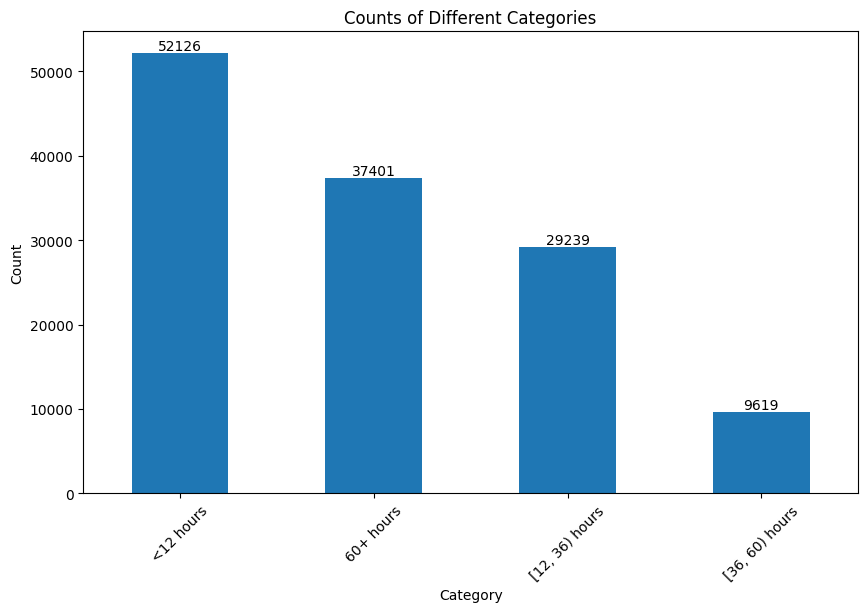

In [81]:
import matplotlib.pyplot as plt

# Assuming data_2 is already defined and has the 'LOS 4 groups' column
category_counts = data_2['LOS 4 groups'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Annotate each bar with its count
for i in range(len(category_counts)):
    plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()


In [82]:
print(data_2.shape)
category_counts = data_2.groupby('LOS 4 groups').size()
print(category_counts)
min_count = category_counts.min()
print(min_count)

(128385, 29)
LOS 4 groups
60+ hours         37401
<12 hours         52126
[12, 36) hours    29239
[36, 60) hours     9619
dtype: int64
9619


In [83]:
def sample_rows(df, n):
    sampled_ids = set()
    sampled_df = pd.DataFrame()
    
    for _, row in df.iterrows():
        if row['ID'] not in sampled_ids and len(sampled_df) < n:
            id_rows = df[df['ID'] == row['ID']]
            sampled_ids.add(row['ID'])
            sampled_df = pd.concat([sampled_df, id_rows])
    
    return sampled_df

balanced_df_post_op = pd.DataFrame()

for category in category_counts.index:
    category_df = data_2[data_2['LOS 4 groups'] == category]
    print(category_df.shape)
    sampled_category_df = sample_rows(category_df, min_count)
    # print(sampled_category_df)
    balanced_df_post_op = pd.concat([balanced_df_post_op, sampled_category_df])

# print(balanced_df)

(37401, 29)
(52126, 29)
(29239, 29)
(9619, 29)


C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\1676612787.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')


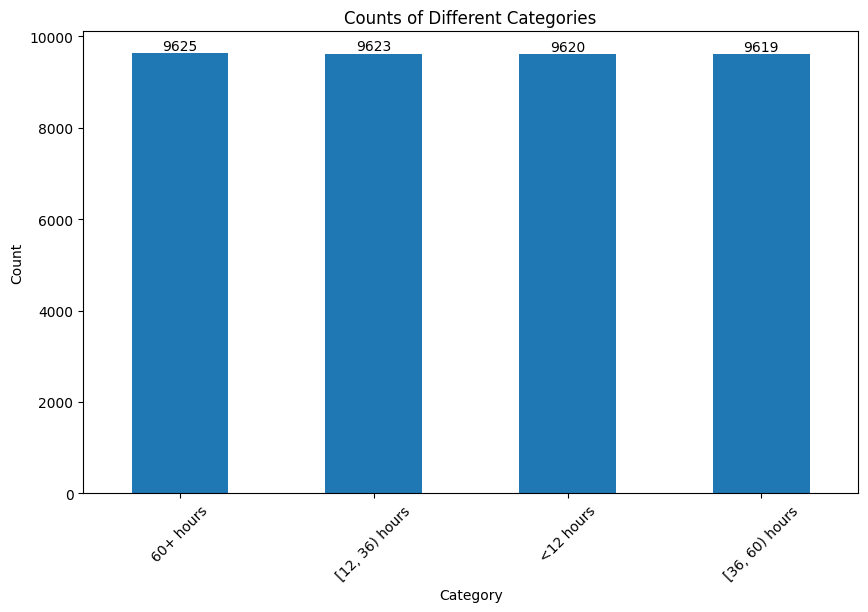

In [84]:
import matplotlib.pyplot as plt

category_counts = balanced_df_post_op['LOS 4 groups'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')

for i in range(len(category_counts)):
    plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

In [85]:
data_3 = data_2.copy()

In [86]:
data_2 = data_2.drop(columns=['ID', 'Estimated Case Duration', 'Primary Service (Rolled Up)', 'Panel Service (Rolled Up)', 'Panel Service'])
balanced_df_post_op = balanced_df_post_op.drop(columns=['ID', 'Estimated Case Duration', 'Primary Service (Rolled Up)', 'Panel Service (Rolled Up)', 'Panel Service'])

In [87]:
print(data_2.shape)
print(balanced_df_post_op.shape)

(128385, 24)
(38487, 24)


In [88]:
nan_counts = data_2.isnull().sum()

# Display the count of NaN values for each feature
print("Number of NaN values in each feature:")
print(nan_counts)

Number of NaN values in each feature:
Age at Surgery                  0
BMI                             0
Sex                             0
Ethnicity                       0
Primary Race                    0
Surgery Diagnosis Name          0
Location                        0
Primary Service                 0
Patient Class                   0
Anesthesia Type                 0
ASA Status                      0
Primary Surgeon ID              0
Primary Procedure Name          0
Robotic Case?                   0
Procedure Name                  0
Scheduled?                      0
Performed?                      0
Procedure Panel                 0
Panel Primary Surgeon ID        0
Scheduled Room Duration         0
Intraop Minutes                 0
LOS 4 groups                    0
Total Scheduled Panel Length    0
Total Panel Default Length      0
dtype: int64


## Post OP Features

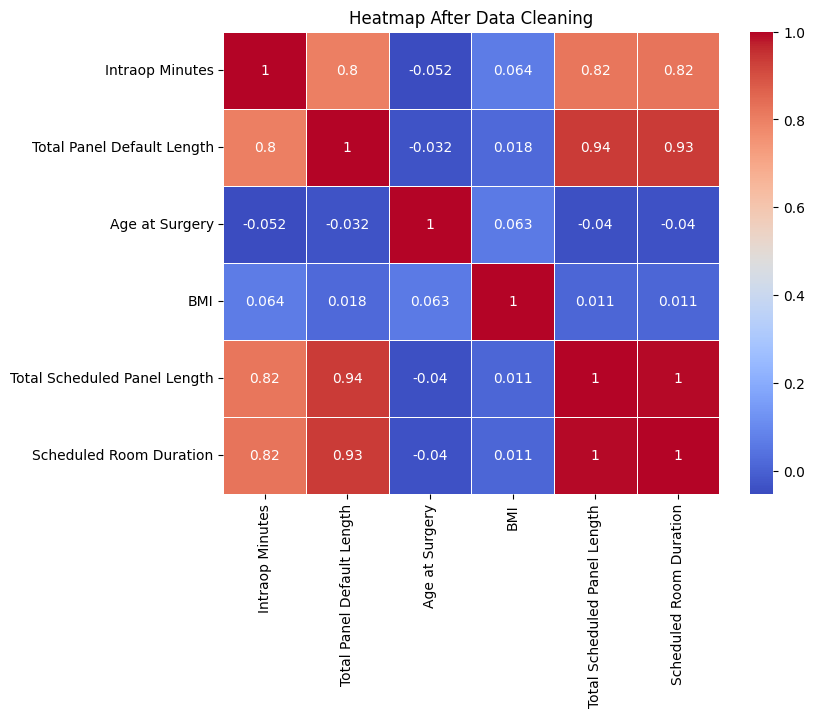

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the specified feature
df_dropped = data_2.drop(columns=['LOS 4 groups'])
# Select specific columns from the balanced dataset for further processing
final_selected_features = [
    'Intraop Minutes', 'Total Panel Default Length', 'Age at Surgery', 
    'BMI', 'Total Scheduled Panel Length', 'Scheduled Room Duration']

# Create a new DataFrame with only the selected features
df_dropped = df_dropped[final_selected_features]

# Calculate the correlation matrix
correlation_matrix = df_dropped.corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap After Data Cleaning")
plt.show()

## Encoding

In [90]:
columns_to_encode = [
    'Sex', 'Ethnicity', 'Primary Race', 'ASA Status','Patient Class', 'Anesthesia Type', 'Robotic Case?',
    'Scheduled?','Performed?', 'Procedure Panel', 'Primary Surgeon ID', 'Panel Primary Surgeon ID',
    'Surgery Diagnosis Name', 'Primary Service', 'Primary Procedure Name', 'Procedure Name','Location'
]

# One-hot encode the columns using pd.get_dummies
data_2_encoded = pd.get_dummies(data_2, columns=columns_to_encode, drop_first=True)
balanced_df_post_op_encoded = pd.get_dummies(balanced_df_post_op, columns=columns_to_encode, drop_first=True)

In [91]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_2_encoded['LOS 4 groups_encoded'] = label_encoder.fit_transform(data_2_encoded['LOS 4 groups'])
balanced_df_post_op_encoded['LOS 4 groups_encoded'] = label_encoder.fit_transform(balanced_df_post_op_encoded['LOS 4 groups'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping for 'LOS 4 groups':", label_mapping)

Label Mapping for 'LOS 4 groups': {'60+ hours': 0, '<12 hours': 1, '[12, 36) hours': 2, '[36, 60) hours': 3}


In [92]:
print(data_2_encoded.shape)
print(balanced_df_post_op_encoded.shape)

(128385, 9865)
(38487, 6158)


In [93]:
nan_counts = balanced_df_post_op_encoded.isnull().sum()

# Filter columns where the count of NaN values is greater than 0
columns_with_nan = nan_counts[nan_counts > 0]

# Display the count of NaN values for these features
print("Features with NaN values and their counts:")
print(columns_with_nan)

Features with NaN values and their counts:
Series([], dtype: int64)


In [97]:

X = balanced_df_post_op_encoded.drop(columns= ['LOS 4 groups_encoded', 'LOS 4 groups'])
y = balanced_df_post_op_encoded['LOS 4 groups_encoded']

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for training data
cv_train_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results for training data
print("Cross-Validation Training Scores:", cv_train_scores)
print("Mean Cross-Validation Training Score:", np.mean(cv_train_scores))
print("Standard Deviation of Cross-Validation Training Scores:", np.std(cv_train_scores))


# Fit the model on the entire training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print detailed evaluation metrics for the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

Cross-Validation Training Scores: [0.91149724 0.91539461 0.90630075 0.90776226 0.90433653]
Mean Cross-Validation Training Score: 0.9090582766004396
Standard Deviation of Cross-Validation Training Scores: 0.00394147649167091

Training Accuracy: 1.0
Test Accuracy: 0.9343985450766433

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1925
           1       0.95      0.98      0.96      1924
           2       0.92      0.91      0.92      1925
           3       0.90      0.91      0.91      1924

    accuracy                           0.93      7698
   macro avg       0.93      0.93      0.93      7698
weighted avg       0.93      0.93      0.93      7698

Confusion Matrix on Test Set:
[[1810   14   15   86]
 [   5 1876   27   16]
 [  32   57 1750   86]
 [  33   29  105 1757]]


## LIME Explainer

In [98]:
import lime
import lime.lime_tabular

# Define a wrapper function for predict_proba
def predict_proba_wrapper(X):
    return model.predict_proba(X)

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=[str(label) for label in model.classes_],
    discretize_continuous=True,
    mode='classification'
)

# Explain a prediction
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test.iloc[i].values, predict_proba_wrapper)

c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [99]:
# Check available labels
print("Available labels:", exp.available_labels())

print("Number of classes in the model:", model.n_classes_)
print("Classes in the model:", model.classes_)

i = 0  # Change this index to another if needed
print("Instance to explain:", X_test.iloc[i].values)

Available labels: [1]
Number of classes in the model: 4
Classes in the model: [0 1 2 3]
Instance to explain: [60 33.45 111.0 ... False False False]


c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\1908230306.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Weight', y='Feature', data=df, palette='viridis', ax=ax)


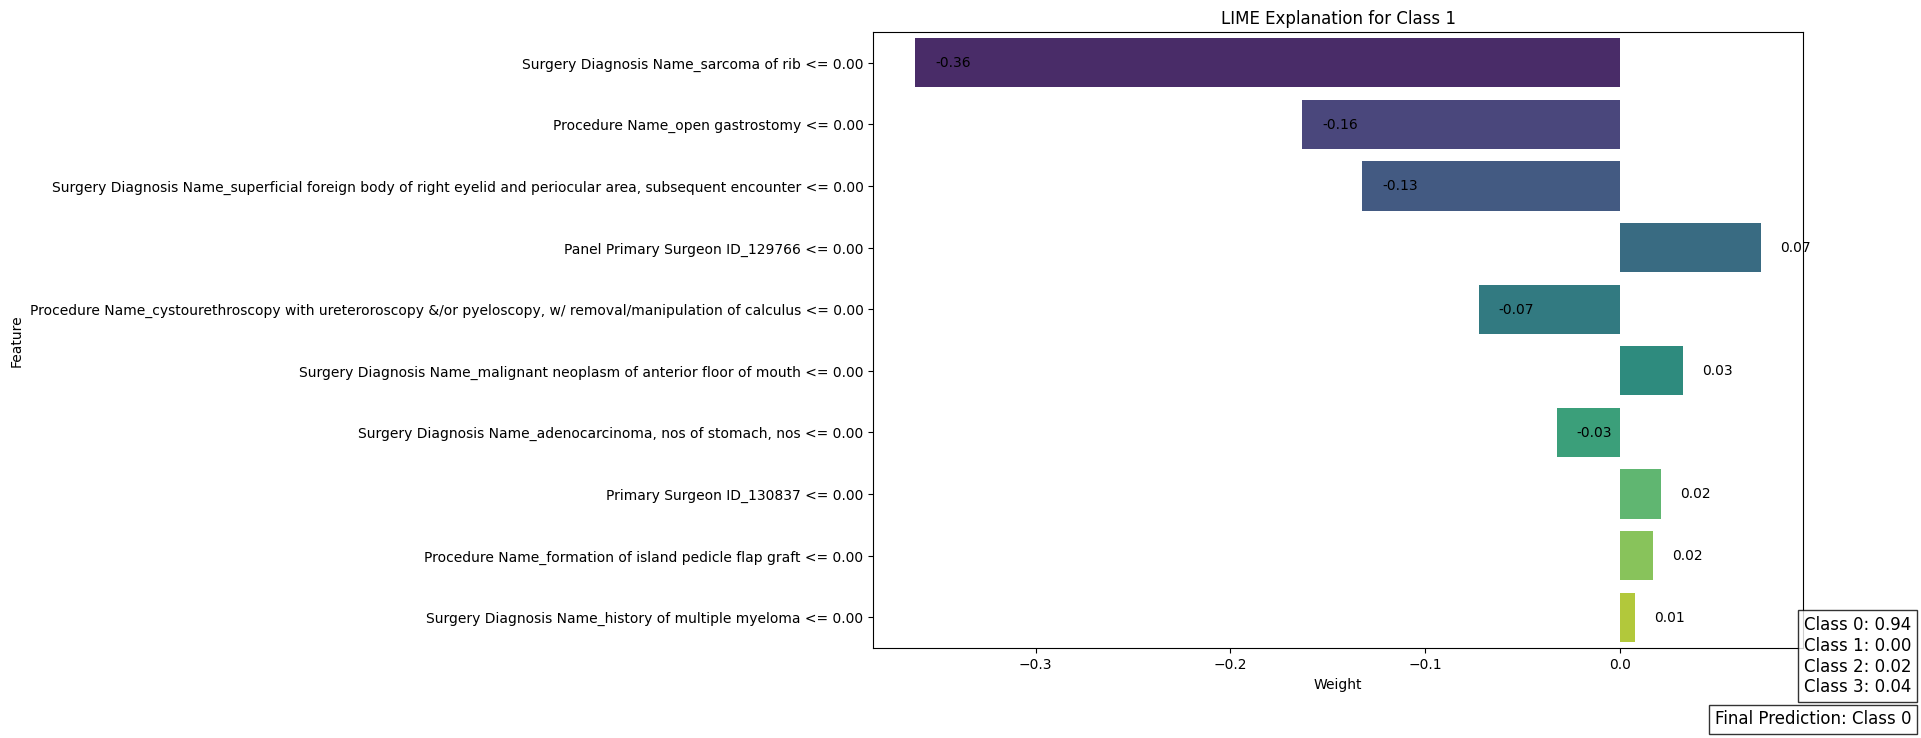

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_lime_explanation(exp, class_idx, feature_names, instance, predict_proba, model):
    # Get explanation for the specified class
    class_exp = exp.as_list(label=class_idx)
    
    # Separate features and their weights
    features, weights = zip(*class_exp)
    
    # Create a DataFrame for visualization
    df = pd.DataFrame({
        'Feature': features,
        'Weight': weights
    })
    
    # Sort by absolute weight magnitude for better visualization
    df['Absolute Weight'] = np.abs(df['Weight'])
    df = df.sort_values('Absolute Weight', ascending=False)
    
    # Predict probabilities for the instance
    probs = predict_proba(np.array([instance]))[0]  # Get probabilities for the instance
    
    # Predict the final class label
    final_prediction = model.predict([instance])[0]
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_plot = sns.barplot(x='Weight', y='Feature', data=df, palette='viridis', ax=ax)
    
    # Add labels to each bar
    for p in bar_plot.patches:
        width = p.get_width()
        label = f'{width:.2f}'
        bar_plot.text(width + 0.01, p.get_y() + p.get_height() / 2., label, ha='left', va='center', fontsize=10)
    
    # Add predicted probabilities
    prob_text = '\n'.join([f'Class {i}: {prob:.2f}' for i, prob in enumerate(probs)])
    plt.figtext(0.99, 0.05, prob_text, horizontalalignment='right', verticalalignment='bottom', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    # Add final prediction
    plt.figtext(0.99, 0.01, f'Final Prediction: Class {final_prediction}', horizontalalignment='right', verticalalignment='bottom', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title(f'LIME Explanation for Class {class_idx}')
    plt.xlabel('Weight')
    plt.ylabel('Feature')
    plt.show()

# Example usage
i = 0  # Index of the instance to explain
instance = X_test.iloc[i].values
exp = explainer.explain_instance(instance, predict_proba_wrapper, num_features=10)

# Plot for a specific class (e.g., class 1)
plot_lime_explanation(exp, class_idx=1, feature_names=X_train.columns, instance=instance, predict_proba=predict_proba_wrapper, model=model)


In [101]:
# Import necessary library
from sklearn.preprocessing import LabelEncoder

# Select specific columns from the balanced dataset for further processing
final_selected_features = [
    'Primary Procedure Name', 'Intraop Minutes', 'Primary Surgeon ID', 'Patient Class', 
    'Total Panel Default Length', 'Primary Service', 'Age at Surgery', 'BMI', 
    'Total Scheduled Panel Length', 'Robotic Case?', 'ASA Status', 'Primary Race', 
    'Surgery Diagnosis Name', 'Anesthesia Type', 'Sex', 'Scheduled Room Duration', 
    'Procedure Panel', 'LOS 4 groups'
]

# Create a new DataFrame with only the selected features
balanced_final_post_op = balanced_df_post_op[final_selected_features]

# List of categorical columns that need to be encoded
columns_to_encode = [
    'Sex', 'Primary Race', 'ASA Status', 'Patient Class', 'Anesthesia Type', 'Robotic Case?',
    'Procedure Panel', 'Primary Surgeon ID', 'Surgery Diagnosis Name', 'Primary Service', 
    'Primary Procedure Name'
]

# Apply one-hot encoding to the specified categorical columns
balanced_final_post_op_encoded = pd.get_dummies(balanced_final_post_op, columns=columns_to_encode, drop_first=True)

# Initialize a LabelEncoder for encoding the target variable
label_encoder = LabelEncoder()

# Encode the 'LOS 4 groups' column and add it to the DataFrame
balanced_final_post_op_encoded['LOS 4 groups_encoded'] = label_encoder.fit_transform(balanced_final_post_op['LOS 4 groups'])

# Create a dictionary mapping original class names to their encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping for the 'LOS 4 groups' column
print("Label Mapping for 'LOS 4 groups':", label_mapping)

# Print the shape of the encoded DataFrame to verify the transformation
print(balanced_final_post_op_encoded.shape)


Label Mapping for 'LOS 4 groups': {'60+ hours': 0, '<12 hours': 1, '[12, 36) hours': 2, '[36, 60) hours': 3}
(38487, 4370)


## XGB - Base Model

In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pyarrow
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming balanced_df_post_op_encoded is your preprocessed DataFrame
# Define feature matrix X by dropping target columns from the DataFrame
X = balanced_final_post_op_encoded.drop(columns=['LOS 4 groups_encoded', 'LOS 4 groups'])

# Define target vector y as the encoded target column
y = balanced_final_post_op_encoded['LOS 4 groups_encoded']

# Clean the column names to remove any illegal characters
X.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X.columns]

# Split the data into training and testing sets with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss')

# Perform Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Stratified K-Fold Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Stratified K-Fold Cross-Validation Scores: [0.83241312 0.83354985 0.82656707 0.82461838 0.82475231]
Mean Accuracy: 0.8284
Standard Deviation: 0.0038

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1925
           1       0.88      0.94      0.91      1924
           2       0.82      0.76      0.79      1925
           3       0.76      0.79      0.78      1924

    accuracy                           0.84      7698
   macro avg       0.84      0.84      0.84      7698
weighted avg       0.84      0.84      0.84      7698

Accuracy Score: 0.8360613146271759
Confusion Matrix:
[[1647   13   52  213]
 [   9 1811   73   31]
 [  57  181 1465  222]
 [ 154   56  201 1513]]


## XGBoost - Hyperparameter tuned model

In [104]:
import shap

In [106]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pyarrow
import sklearn

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming balanced_df_post_op_encoded is your preprocessed DataFrame
X = balanced_final_post_op_encoded.drop(columns=['LOS 4 groups_encoded', 'LOS 4 groups'])
y = balanced_final_post_op_encoded['LOS 4 groups_encoded']

X.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X.columns]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss',
                          learning_rate=np.float64(0.19066019996206915), max_depth=7, n_estimators=102)

# Perform Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Stratified K-Fold Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# SHAP Analysis
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

Stratified K-Fold Cross-Validation Scores: [0.83484898 0.83501137 0.82786619 0.83013966 0.82670132]
Mean Accuracy: 0.8309
Standard Deviation: 0.0035

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1925
           1       0.88      0.94      0.91      1924
           2       0.83      0.77      0.80      1925
           3       0.77      0.79      0.78      1924

    accuracy                           0.84      7698
   macro avg       0.84      0.84      0.84      7698
weighted avg       0.84      0.84      0.84      7698

Accuracy Score: 0.8393089114055599
Confusion Matrix:
[[1647   20   48  210]
 [   8 1817   68   31]
 [  75  165 1476  209]
 [ 154   62  187 1521]]


## SHAP

SHAP summary plot for class 0


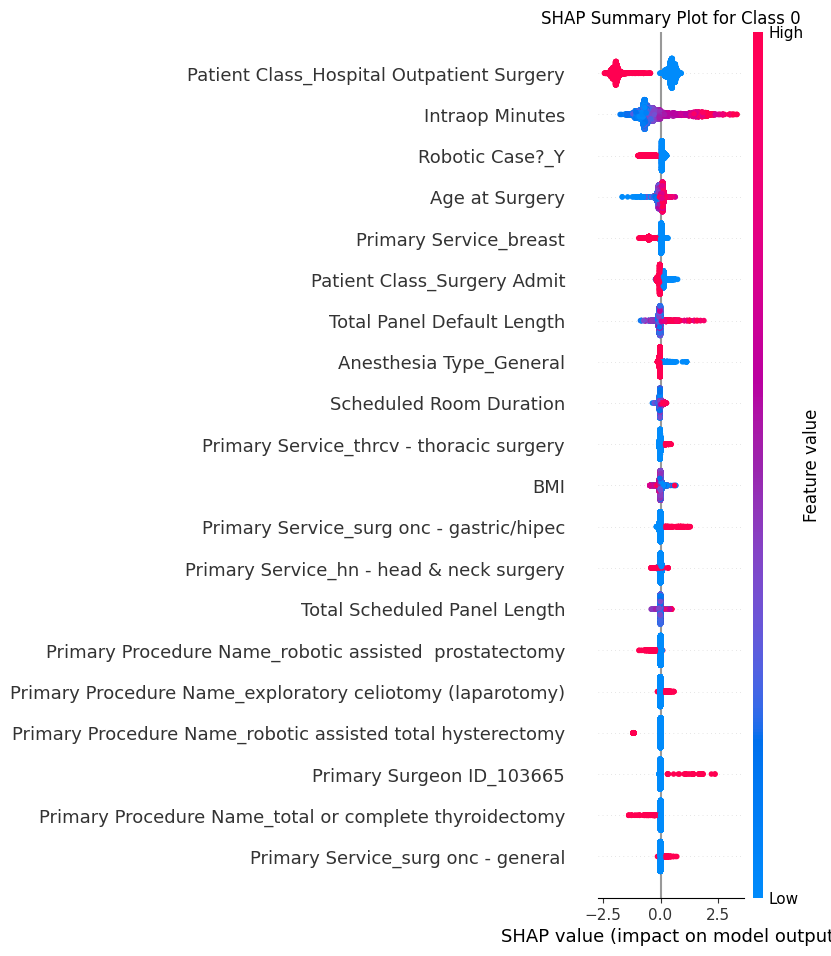

SHAP summary plot for class 1


c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


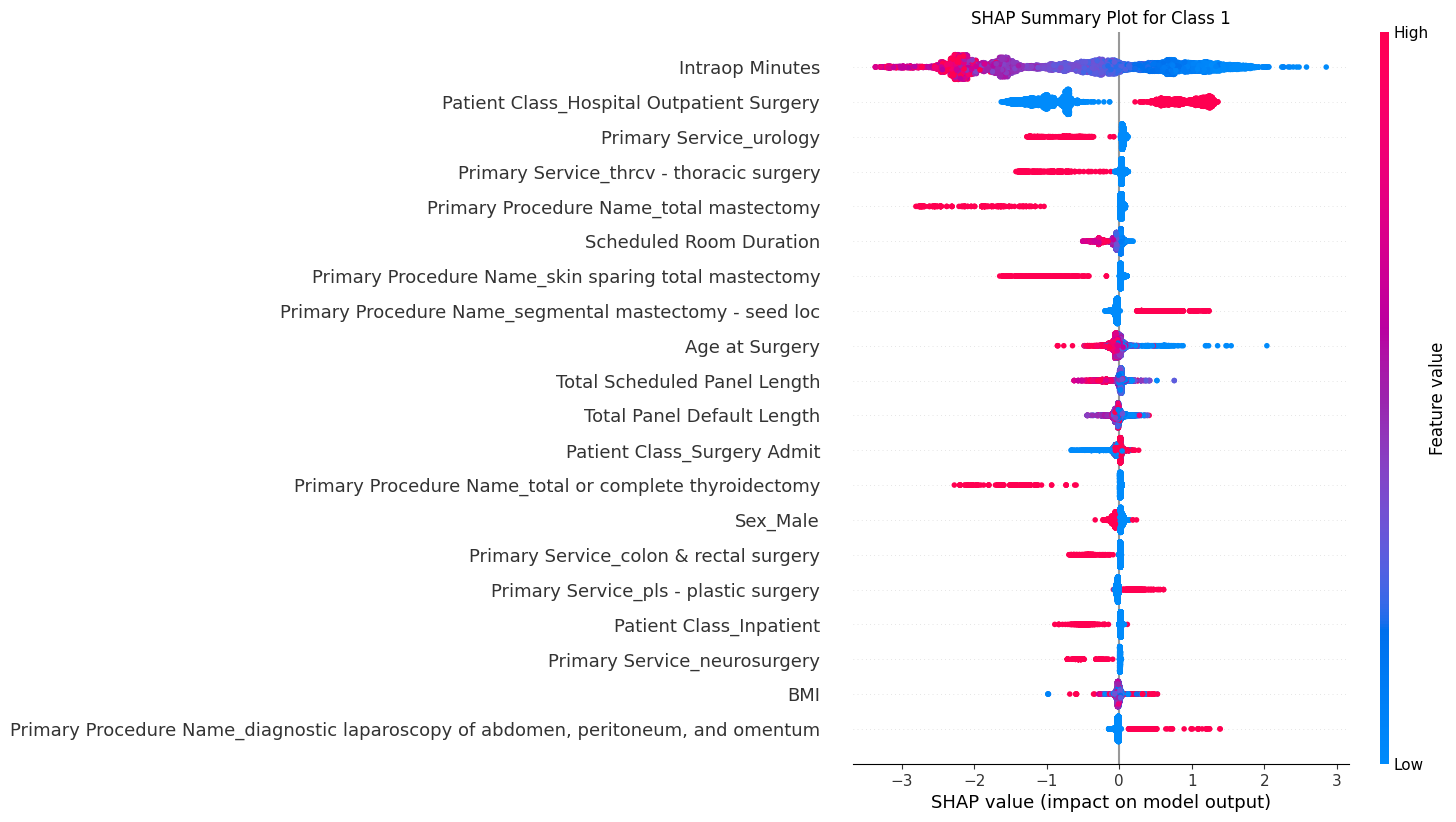

SHAP summary plot for class 2


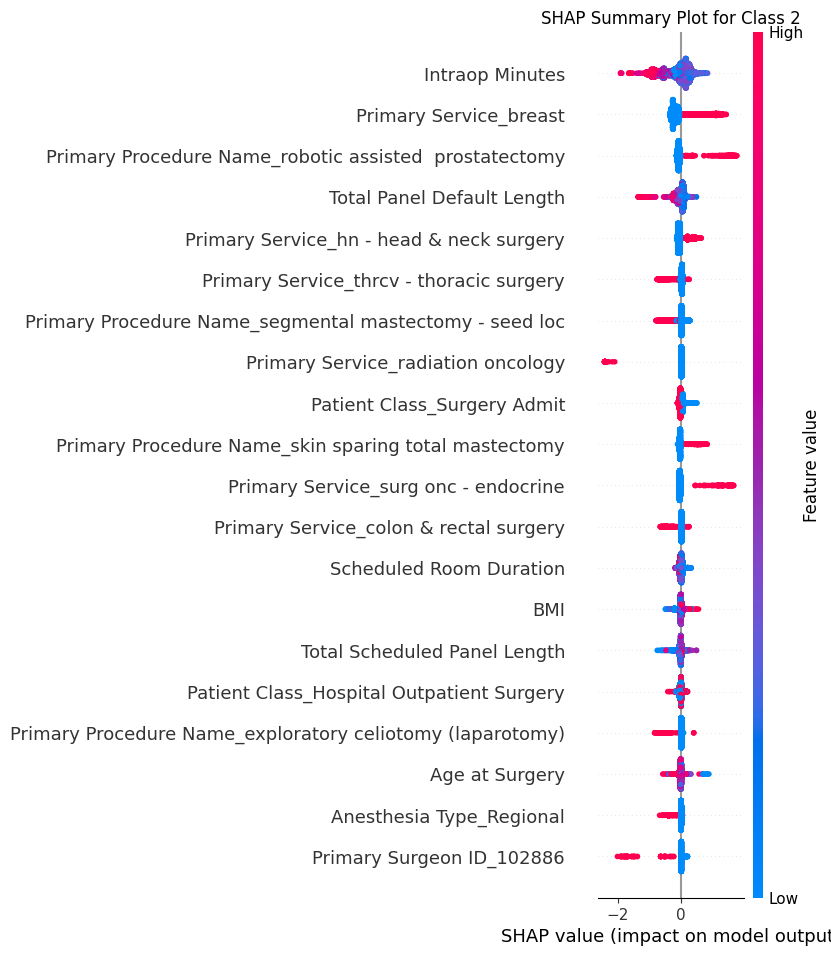

SHAP summary plot for class 3


c:\Users\ssriram1\Documents\Code\mda_env\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


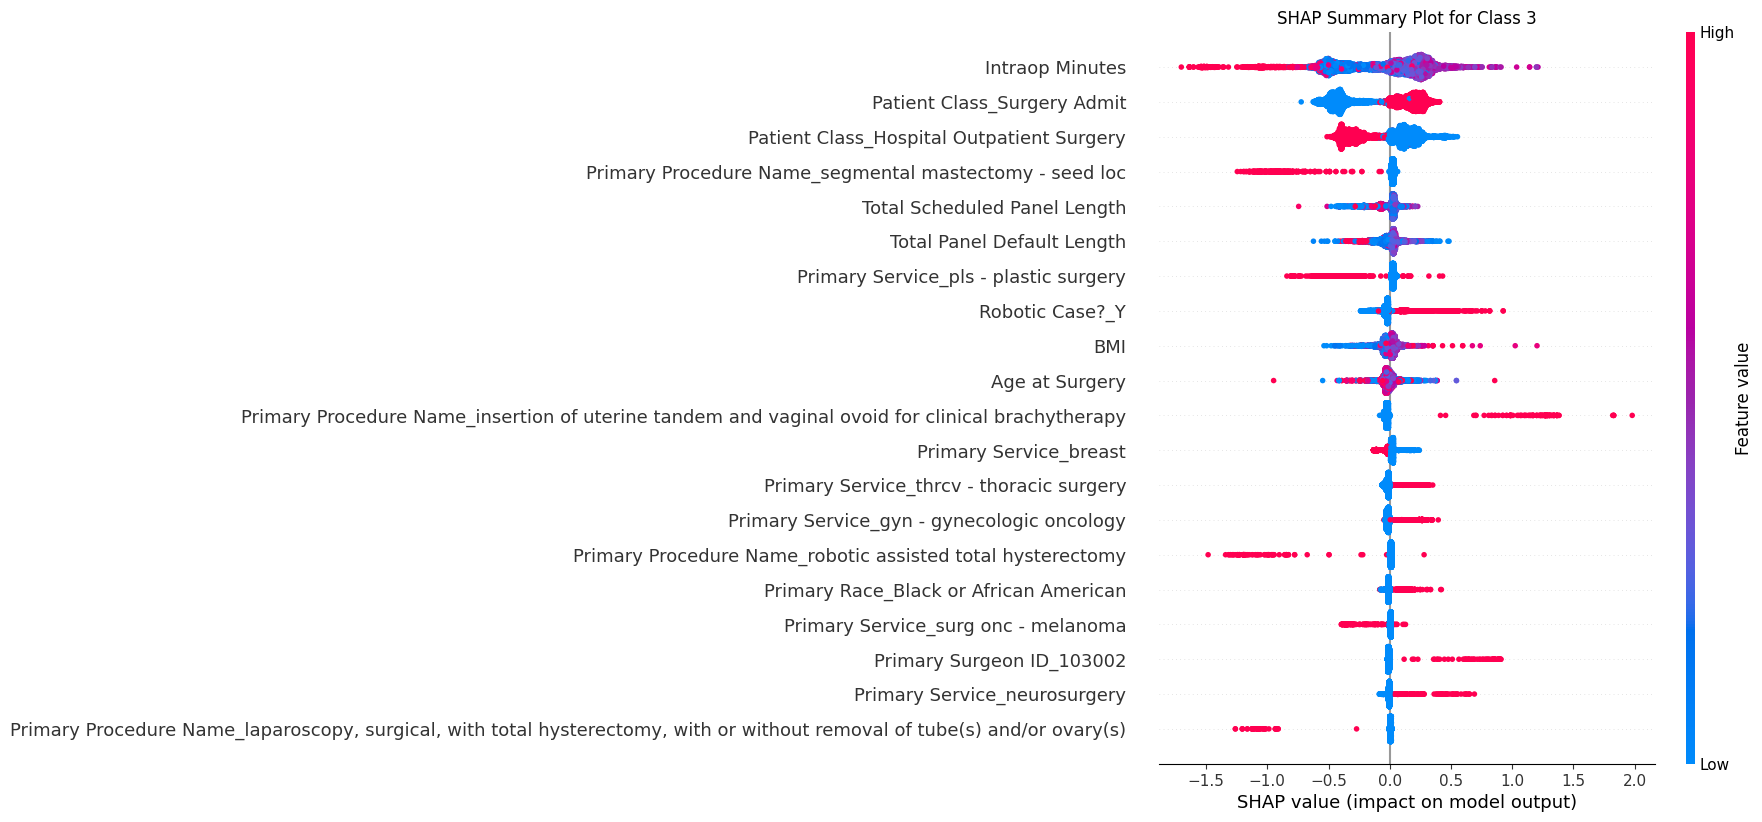

In [107]:
# Visualize SHAP values for each class
for class_index in range(shap_values.shape[2]):  # Loop over the number of classes
    print(f"SHAP summary plot for class {class_index}")
    shap.summary_plot(shap_values[:, :, class_index], X_test, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_index}")
    plt.show()

In [108]:
print(shap_values.shape)

(7698, 4368, 4)


## Partial Dependence Plots

In [109]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

<Figure size 1000x1000 with 0 Axes>

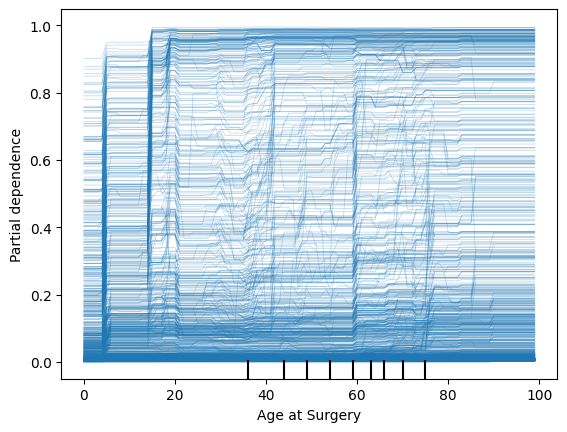

In [110]:
features_PDP = ['Age at Surgery']
plt.figure(figsize = (10,10))
PartialDependenceDisplay.from_estimator(model, X, features_PDP, kind='individual', target=0)

<Figure size 1000x1000 with 0 Axes>

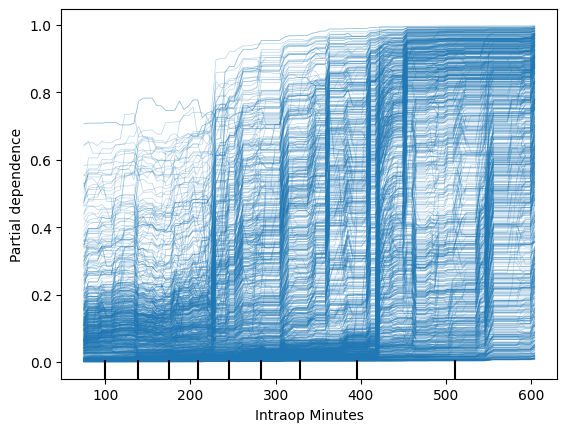

In [111]:
features_PDP = ['Intraop Minutes']
plt.figure(figsize = (10,10))
PartialDependenceDisplay.from_estimator(model, X, features_PDP, kind='individual', target=0)

<Figure size 1000x1000 with 0 Axes>

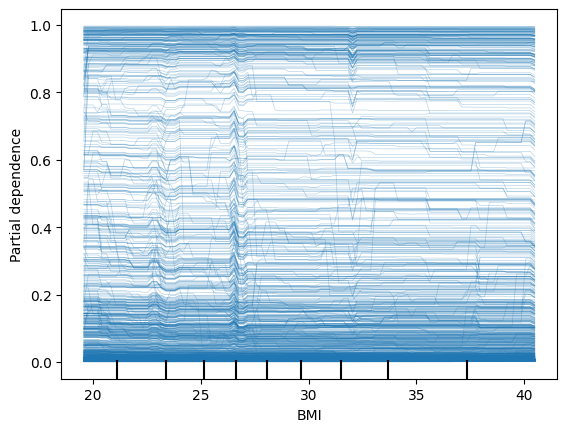

In [112]:
features_PDP = ['BMI']
plt.figure(figsize = (10,10))
PartialDependenceDisplay.from_estimator(model, X, features_PDP, kind='individual', target=0)

<Figure size 1000x1000 with 0 Axes>

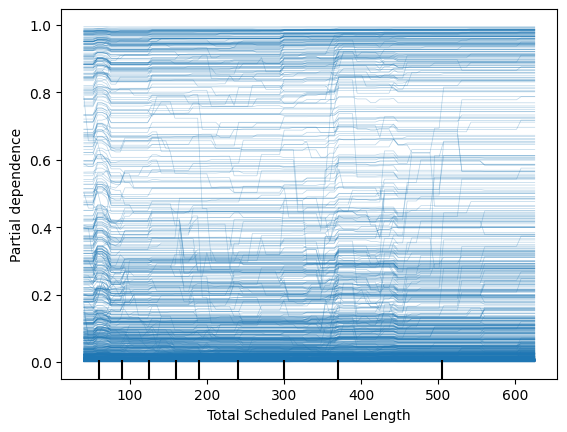

In [113]:
features_PDP = ['Total Scheduled Panel Length']
plt.figure(figsize = (10,10))
PartialDependenceDisplay.from_estimator(model, X, features_PDP, kind='individual', target=0)

<Figure size 1000x1000 with 0 Axes>

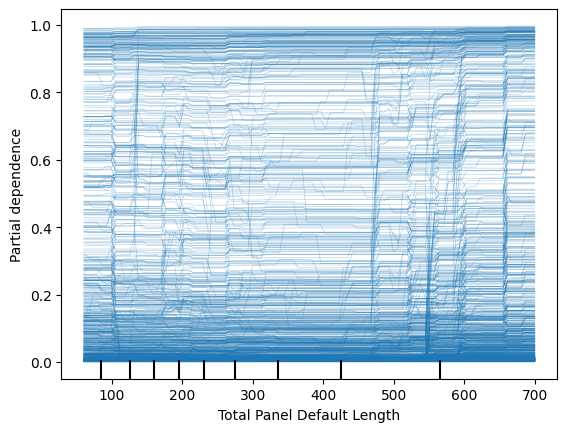

In [114]:
features_PDP = ['Total Panel Default Length']
plt.figure(figsize = (10,10))
PartialDependenceDisplay.from_estimator(model, X, features_PDP, kind='individual', target=0)

## Accumulated Local Effects

In [115]:
# %pip install PyALE

In [116]:
from PyALE import ale

PyALE._ALE_generic:INFO: Continuous feature detected.


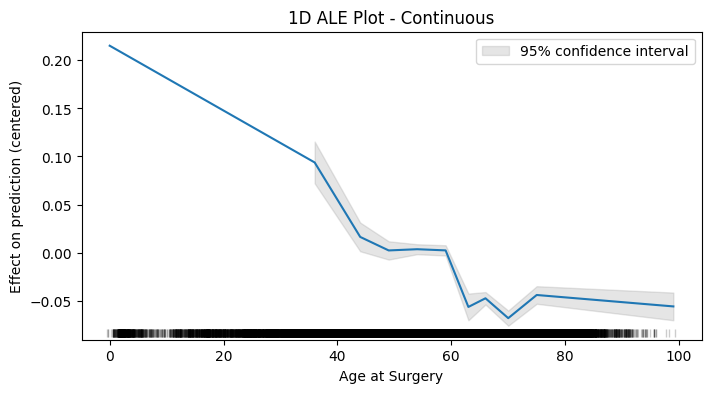

In [117]:
features_ale = ['Age at Surgery']
ale_eff = ale(X,model,features_ale,grid_size=10,include_CI=True)

PyALE._ALE_generic:INFO: Continuous feature detected.


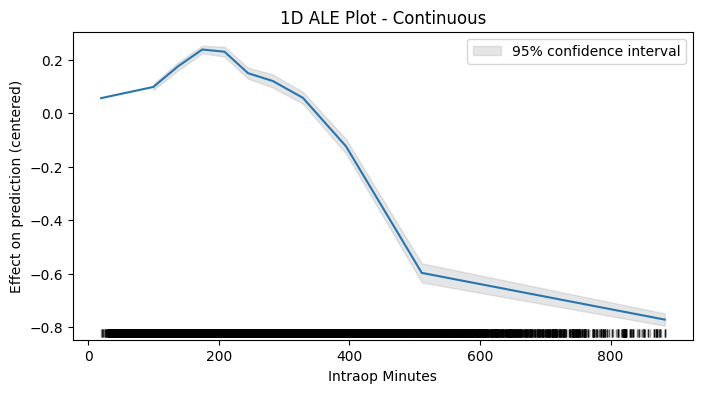

In [118]:
features_ale = ['Intraop Minutes']
ale_eff = ale(X,model,features_ale,grid_size=10,include_CI=True)

## PreOP Features

In [119]:
data_3 = data_3[data_3['Scheduled?'] == 'Y']

print(data_3.shape)
category_counts = data_3.groupby('LOS 4 groups').size()
print(category_counts)
min_count = category_counts.min()
print(min_count)

(108324, 29)
LOS 4 groups
60+ hours         28343
<12 hours         46878
[12, 36) hours    25502
[36, 60) hours     7601
dtype: int64
7601


C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\2583852526.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')


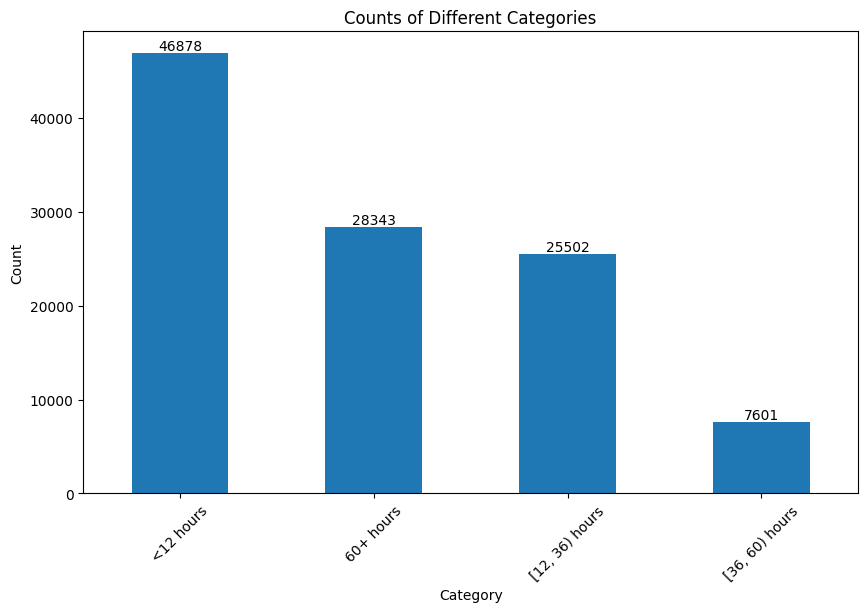

In [120]:
import matplotlib.pyplot as plt

category_counts = data_3['LOS 4 groups'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')

for i in range(len(category_counts)):
    plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

In [121]:
def sample_rows(df, n):
    sampled_ids = set()
    sampled_df = pd.DataFrame()
    
    for _, row in df.iterrows():
        if row['ID'] not in sampled_ids and len(sampled_df) < n:
            id_rows = df[df['ID'] == row['ID']]
            sampled_ids.add(row['ID'])
            sampled_df = pd.concat([sampled_df, id_rows])
    
    return sampled_df

balanced_df_pre_op = pd.DataFrame()

for category in category_counts.index:
    category_df = data_3[data_3['LOS 4 groups'] == category]
    print(category_df.shape)
    sampled_category_df = sample_rows(category_df, min_count)
    # print(sampled_category_df)
    balanced_df_pre_op = pd.concat([balanced_df_pre_op, sampled_category_df])

# print(balanced_df)

(46878, 29)
(28343, 29)
(25502, 29)
(7601, 29)


C:\Users\ssriram1\AppData\Local\Temp\ipykernel_13500\2079790870.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')


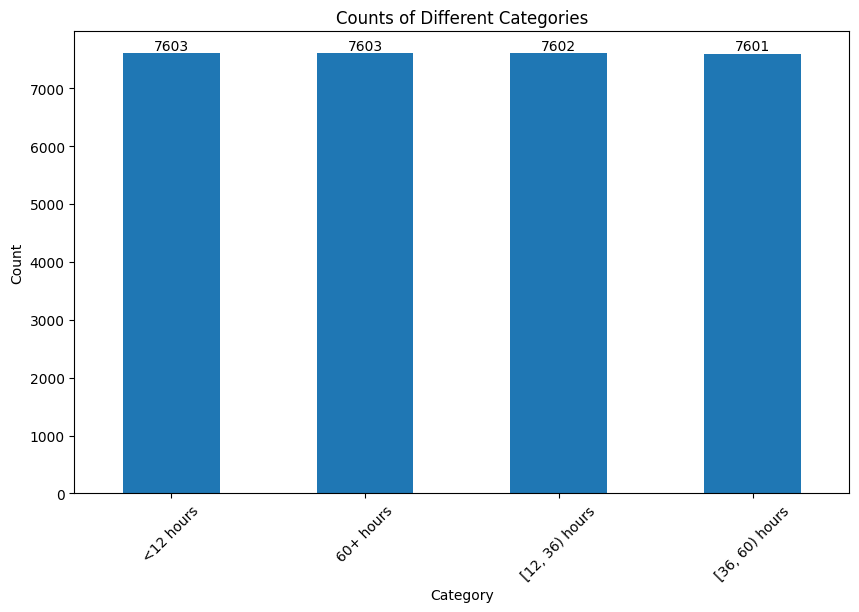

In [122]:
import matplotlib.pyplot as plt

category_counts = balanced_df_pre_op['LOS 4 groups'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Counts of Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')

for i in range(len(category_counts)):
    plt.annotate(str(category_counts[i]), xy=(i, category_counts[i]), ha='center', va='bottom')


# Rotate the x-axis tick labels
plt.xticks(rotation=45)

plt.show()

In [123]:
data_3 = data_3.drop(columns=['ID', 'Estimated Case Duration', 'Primary Service (Rolled Up)', 'Panel Service (Rolled Up)', 'Panel Service', 'Intraop Minutes', 'Scheduled?', 'Location', 'Patient Class'])
balanced_df_pre_op = balanced_df_pre_op.drop(columns=['ID', 'Estimated Case Duration', 'Primary Service (Rolled Up)', 'Panel Service (Rolled Up)', 'Panel Service', 'Intraop Minutes', 'Scheduled?', 'Location', 'Patient Class'])

In [124]:
print(data_3.shape)
print(balanced_df_pre_op.shape)

(108324, 20)
(30409, 20)


In [125]:
balanced_df_pre_op.columns

Index(['Age at Surgery', 'BMI', 'Sex', 'Ethnicity', 'Primary Race',
       'Surgery Diagnosis Name', 'Primary Service', 'Anesthesia Type',
       'ASA Status', 'Primary Surgeon ID', 'Primary Procedure Name',
       'Robotic Case?', 'Procedure Name', 'Performed?', 'Procedure Panel',
       'Panel Primary Surgeon ID', 'Scheduled Room Duration', 'LOS 4 groups',
       'Total Scheduled Panel Length', 'Total Panel Default Length'],
      dtype='object')

In [126]:
columns_to_encode = [
    'Sex', 'Ethnicity', 'Primary Race', 'ASA Status', 'Anesthesia Type', 'Robotic Case?',
    'Performed?', 'Procedure Panel', 'Primary Surgeon ID', 'Panel Primary Surgeon ID',
    'Surgery Diagnosis Name', 'Primary Service', 'Primary Procedure Name', 'Procedure Name']

# One-hot encode the columns using pd.get_dummies
data_3_encoded = pd.get_dummies(data_3, columns=columns_to_encode, drop_first=True)
balanced_df_pre_op_encoded = pd.get_dummies(balanced_df_pre_op, columns=columns_to_encode, drop_first=True)

In [127]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_3_encoded['LOS 4 groups_encoded'] = label_encoder.fit_transform(data_3_encoded['LOS 4 groups'])
balanced_df_pre_op_encoded['LOS 4 groups_encoded'] = label_encoder.fit_transform(balanced_df_pre_op_encoded['LOS 4 groups'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping for 'LOS 4 groups':", label_mapping)

Label Mapping for 'LOS 4 groups': {'60+ hours': 0, '<12 hours': 1, '[12, 36) hours': 2, '[36, 60) hours': 3}


In [128]:
import pandas as pd
import numpy as np
import pyarrow
import sklearn

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming balanced_df_post_op_encoded is your preprocessed DataFrame
X = balanced_df_pre_op_encoded.drop(columns=['LOS 4 groups_encoded', 'LOS 4 groups'])
y = balanced_df_pre_op_encoded['LOS 4 groups_encoded']

# Clean the column names to remove any illegal characters
X.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X.columns]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Stratified K-Fold Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Stratified K-Fold Cross-Validation Scores: [0.86066584 0.86970818 0.86618705 0.8651593  0.87543679]
Mean Accuracy: 0.8674
Standard Deviation: 0.0049

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1521
           1       0.87      0.97      0.92      1521
           2       0.89      0.86      0.87      1520
           3       0.88      0.86      0.87      1520

    accuracy                           0.89      6082
   macro avg       0.89      0.89      0.89      6082
weighted avg       0.89      0.89      0.89      6082

Accuracy Score: 0.8939493587635646
Confusion Matrix:
[[1358   37   29   97]
 [   9 1468   27   17]
 [  25  126 1302   67]
 [  59   48  104 1309]]
